# ABOUT


Datascientest's Datascientist continuous bootcamp - cohorte Mars2022 -  AeroBOT project

**Tutor**

* Alban THUET

**Authors:**

* Hélène ASSIR
* [Ioannis STASINOPOULOS](https://www.linkedin.com/in/ioannis-stasinopoulos/)

</br>

---
</br>

**Version History**

Version | Date       | Author(s)  | Modification
--------|----------- | ---------  | --------------------------
1.5     | 21/10/2022 | H.A.       | Order id to order labels in plots
1.4     | 20/09/2022 | H.A.       | Plot title with \n . 
1.3     | 15/09/2022 | H.A.       | Color coding for Frozen/Unrozen BERT & Figure size automatically scaled  
1.2     | 15/09/2022 | H.A./I.S.  | Specific plot for BERT 
1.1     | 13/09/2022 | H.A./I.S.  | Plots all models (1vs all/multilabel)
1.0     | 24/08/2022 | H.A.       | Plots metrics by model with dataviz

# IMPORT PACKAGES


In [320]:
#######################
# Import packages
#######################
import numpy as np
import seaborn as sns
import math # for math.pi etc.
import time # time code execution

#######################
# Pandas
#######################
import pandas as pd
# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option("display.colheader_justify","left") # left-justify the print output of pandas

### Display full columnwidth
# Set pandas settings to display full text columns
#pd.options.display.max_colwidth = None
# Restore pandas settings to display standard colwidth
pd.reset_option('display.max_colwidth')

import itertools # Pour créer des iterateurs

# Package to show the progression of pandas operations
from tqdm import tqdm
# from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()
# simply use .progress_apply() instead of .apply() on your pd.DataFram

######################
# PLOTTING
######################
import matplotlib.pyplot as plt
%matplotlib inline


###############################
# Other
###############################
import pickle as pkl # Saving data externally

# LOAD DATA

## Mount GDrive

In [321]:
#@title
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

#check your present working directory 
%pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'/content/drive/My Drive/data/saved models/Yannis/2022_08_19_WordEmbedding_Multilabel_PADDING_tests'

In [322]:
#@title
# move to the transformed data location (you can create a deeper structure, if needed, e.g. to save a trained model):
%cd /content/drive/MyDrive/data/transformed/

/content/drive/MyDrive/data/transformed


In [323]:
#@title
!ls # list the content of the pwd

#!ls "/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/" # list contect of a speficic folder

 complaints-2022-08-05_13_55.csv
'Copy of Qualified abbreviations_20220718.xlsx.gsheet'
'Data Dictionnary.xlsx'
 data_for_BERT_multilabel_20220805.pkl
 df_for_Anomaly_prediction.pkl
 df_test_for_Anomaly_prediction.pkl
 model.png
 model_results
 Narrative_PP_stemmed_24072022_TRAIN.pkl
 Narrative_Raw_Stemmed_24072022_TRAIN.pkl
 Narrative_RegEx_subst_21072022_TRAIN.pkl
'Qualified abbreviations_20220707_test.csv'
'Qualified abbreviations_20220708.csv'
'Qualified abbreviations_20220718.csv'
'Qualified abbreviations_20220718_Google_sheet.gsheet'
 test_data_final.pkl
 train_data_final.pkl





## Load 1 VS ALL - BASELINE MODEL - dataframes from .pkl file 
- 1 vs all  classification report format


In [324]:
# Import DataFrames into a list
%cd /content/drive/MyDrive/data/transformed/model_results

filename_list = [
                  'df_metrics_DT_RAW.pkl',            
           #       'df_metrics_DT_PP.pkl',            
                 ]

df_list = []

for filename in filename_list:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[0])

print(f"Files {filename_list} loaded")
  
model_results_1vsall_BLM = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_1vsall_BLM = model_results_1vsall_BLM.reset_index().drop(columns =['index'])

/content/drive/MyDrive/data/transformed/model_results
Files ['df_metrics_DT_RAW.pkl'] loaded


In [325]:
# Check of the df length ; for each model : must contain 4 metrics rows for each of the 14 anomalies 
print('Check of df size :',len(model_results_1vsall_BLM), ' must be equal to ',14*4*len(filename_list))

Check of df size : 56  must be equal to  56


In [326]:
model_results_1vsall_BLM.head()


classifier      preprocessing  undersampling  Count_Vectorizer_opts  \
0  Decision Tree  0              0             NaN                      
1  Decision Tree  0              0             NaN                      
2  Decision Tree  0              0             NaN                      
3  Decision Tree  0              0             NaN                      
4  Decision Tree  0              0             NaN                      

  anomaly                                       metric      0            \
0  Anomaly_Deviation / Discrepancy - Procedural  precision     0.640894   
1  Anomaly_Deviation / Discrepancy - Procedural     recall     0.484704   
2  Anomaly_Deviation / Discrepancy - Procedural   f1-score     0.551962   
3  Anomaly_Deviation / Discrepancy - Procedural    support  7747.000000   
4                    Anomaly_Aircraft Equipment  precision     0.842790   

   1             accuracy  macro avg     weighted avg  
0      0.705148  0.685741      0.673021      0.679487  
1      0.819415  0.685741      0.652059      0.685741  
2      0.757999  0.685741      0.654981      0.675714  
3  11651.000000  0.685741  19398.000000  19398.000000  
4      0.822690  0.835602      0.832740      0.834846

### Transform in Common format : 

In [327]:
# label of the model , including options
model_results_1vsall_BLM['approach']='Base line model'
model_results_1vsall_BLM['model_label']=model_results_1vsall_BLM['classifier']  \
                                  +'/'+model_results_1vsall_BLM['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP') \
                                  +'/'+model_results_1vsall_BLM['undersampling'].apply(lambda x: 'Std sampling' if x==0 else 'Under sampling') \
                                  +'/'+model_results_1vsall_BLM['Count_Vectorizer_opts'].apply(lambda x: '' if str(x)=='nan' else str(x))
      

In [328]:
model_results_1vsall_BLM_select=model_results_1vsall_BLM[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

In [329]:
model_results_1vsall_BLM_select.head()

approach         model_label                      classifier      \
0  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
1  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
2  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
3  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
4  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   

   preprocessing  undersampling anomaly                                        \
0  0              0              Anomaly_Deviation / Discrepancy - Procedural   
1  0              0              Anomaly_Deviation / Discrepancy - Procedural   
2  0              0              Anomaly_Deviation / Discrepancy - Procedural   
3  0              0              Anomaly_Deviation / Discrepancy - Procedural   
4  0              0                                Anomaly_Aircraft Equipment   

  metric      1             
0  precision      0.705148  
1     recall      0.819415  
2   f1-score      0.757999  
3    support  11651.000000  
4  precision      0.822690

## Load 1 VS ALL - UNSUPERVISED dataframes from .pkl file 
- 1 vs all  classification report format

In [330]:
# Hichem's input : 
#Voici mes meilleurs modèles selon le f1-scores:
# df_metrics_DT_PP_RN_MDF_12
# df_metrics_RF_PP_RN_MDF_12
# NBayes_TIDFVEC_PP_NWORDS_3000

In [331]:
# Import DataFrames into a list
%cd /content/drive/MyDrive/data/transformed/model_results/


filename_list = [
                 'df_metrics_DT_PP_RN_MDF_12.pkl', 
                 'df_metrics_DT_PP_US_RN_MDF.pkl',
                   'df_metrics_DT_PP_RN_MDF_100.pkl',
                   'df_metrics_DT_PP_RN_MDF_1600.pkl',

                  'df_metrics_RF_PP_RN_MDF_12.pkl',   
                'df_metrics_RF_PP_US_RN_MDF.pkl',
                'df_metrics_RF_PP_RN_MDF_100.pkl',
                   'df_metrics_RF_PP_RN_MDF_1600.pkl'

                 ]

df_list = []

for filename in filename_list:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[0])

print(f"Files {filename_list} loaded")
  
model_results_1vsall_UFS = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_1vsall_UFS = model_results_1vsall_UFS.reset_index().drop(columns =['index'])

/content/drive/MyDrive/data/transformed/model_results
Files ['df_metrics_DT_PP_RN_MDF_12.pkl', 'df_metrics_DT_PP_US_RN_MDF.pkl', 'df_metrics_DT_PP_RN_MDF_100.pkl', 'df_metrics_DT_PP_RN_MDF_1600.pkl', 'df_metrics_RF_PP_RN_MDF_12.pkl', 'df_metrics_RF_PP_US_RN_MDF.pkl', 'df_metrics_RF_PP_RN_MDF_100.pkl', 'df_metrics_RF_PP_RN_MDF_1600.pkl'] loaded


In [332]:
# Check of the df length ; for each model : must contain 4 metrics rows for each of the 14 anomalies 
print('Check of df size :',len(model_results_1vsall_UFS), ' must be equal to ',14*4*len(filename_list))

Check of df size : 448  must be equal to  448


In [333]:
#model_results_1vsall_UFS['Count_Vectorizer_opts'] = model_results_1vsall_UFS['Count_Vectorizer_opts'].apply(lambda x:x[-4:] if x[-4]!= '=' else x[-3:]).astype('int')

In [334]:
model_results_1vsall_UFS.head()

anomaly                     classifier               preprocessing  \
0  Anomaly_Aircraft Equipment  DecisionTreeClassifier  1               
1  Anomaly_Aircraft Equipment  DecisionTreeClassifier  1               
2  Anomaly_Aircraft Equipment  DecisionTreeClassifier  1               
3  Anomaly_Aircraft Equipment  DecisionTreeClassifier  1               
4  Anomaly_Airspace Violation  DecisionTreeClassifier  1               

   undersampling Count_Vectorizer_opts         metric      0             \
0  0              exclude_numbers; min_df = 12  precision      0.847078   
1  0              exclude_numbers; min_df = 12     recall      0.889533   
2  0              exclude_numbers; min_df = 12   f1-score      0.867786   
3  0              exclude_numbers; min_df = 12    support  11732.000000   
4  0              exclude_numbers; min_df = 12  precision      0.974597   

   1            accuracy  macro avg     weighted avg  
0     0.816897  0.836066      0.831988      0.835151  
1     0.754239  0.836066      0.821886      0.836066  
2     0.784319  0.836066      0.826053      0.834801  
3  7666.000000  0.836066  19398.000000  19398.000000  
4     0.599631  0.964120      0.787114      0.959056

### Transform in Common format : 

In [335]:
model_results_1vsall_UFS['approach']='BoW Unsupervised feature selection'
model_results_1vsall_UFS['model_label']=model_results_1vsall_UFS['classifier']   \
                                        +'/'+model_results_1vsall_UFS['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP')   \
                                        +'/'+model_results_1vsall_UFS['undersampling'].apply(lambda x: 'Std sampling' if x==0 else 'Under sampling')   \
                                        +'/'+model_results_1vsall_UFS['Count_Vectorizer_opts'].apply(lambda x: '' if str(x)=='nan' else str(x))

In [336]:
model_results_1vsall_UFS.head()

anomaly                     classifier               preprocessing  \
0  Anomaly_Aircraft Equipment  DecisionTreeClassifier  1               
1  Anomaly_Aircraft Equipment  DecisionTreeClassifier  1               
2  Anomaly_Aircraft Equipment  DecisionTreeClassifier  1               
3  Anomaly_Aircraft Equipment  DecisionTreeClassifier  1               
4  Anomaly_Airspace Violation  DecisionTreeClassifier  1               

   undersampling Count_Vectorizer_opts         metric      0             \
0  0              exclude_numbers; min_df = 12  precision      0.847078   
1  0              exclude_numbers; min_df = 12     recall      0.889533   
2  0              exclude_numbers; min_df = 12   f1-score      0.867786   
3  0              exclude_numbers; min_df = 12    support  11732.000000   
4  0              exclude_numbers; min_df = 12  precision      0.974597   

   1            accuracy  macro avg     weighted avg  \
0     0.816897  0.836066      0.831988      0.835151   
1     0.754239  0.836066      0.821886      0.836066   
2     0.784319  0.836066      0.826053      0.834801   
3  7666.000000  0.836066  19398.000000  19398.000000   
4     0.599631  0.964120      0.787114      0.959056   

  approach                             \
0  BoW Unsupervised feature selection   
1  BoW Unsupervised feature selection   
2  BoW Unsupervised feature selection   
3  BoW Unsupervised feature selection   
4  BoW Unsupervised feature selection   

  model_label                                         
0  DecisionTreeClassifier/PP/Std sampling/exclude...  
1  DecisionTreeClassifier/PP/Std sampling/exclude...  
2  DecisionTreeClassifier/PP/Std sampling/exclude...  
3  DecisionTreeClassifier/PP/Std sampling/exclude...  
4  DecisionTreeClassifier/PP/Std sampling/exclude...

In [337]:
model_results_1vsall_UFS_select=model_results_1vsall_UFS[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

## Load MULTILABEL Naive bayes DataFrames from .pkl files


In [338]:
# Import DataFrames into a list
%cd /content/drive/MyDrive/data/transformed/model_results/

filename_list = [
                 'NBayes_COUNTVEC_PP_NWORDS_500.pkl', 
                    'NBayes_COUNTVEC_PP_NWORDS_1000.pkl',
                    'NBayes_COUNTVEC_PP_NWORDS_3000.pkl',
                  'NBayes_TIDFVEC_PP_NWORDS_500.pkl',   
                    'NBayes_TIDFVEC_PP_NWORDS_1000.pkl',
                    'NBayes_TIDFVEC_PP_NWORDS_3000.pkl'
                 ]

df_list = []

for filename in filename_list:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[0])

print(f"Files {filename_list} loaded")
  
model_results_multilabel_NB = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_multilabel_NB = model_results_multilabel_NB.reset_index().drop(columns =['index'])

/content/drive/MyDrive/data/transformed/model_results
Files ['NBayes_COUNTVEC_PP_NWORDS_500.pkl', 'NBayes_COUNTVEC_PP_NWORDS_1000.pkl', 'NBayes_COUNTVEC_PP_NWORDS_3000.pkl', 'NBayes_TIDFVEC_PP_NWORDS_500.pkl', 'NBayes_TIDFVEC_PP_NWORDS_1000.pkl', 'NBayes_TIDFVEC_PP_NWORDS_3000.pkl'] loaded


In [339]:
model_results_multilabel_NB['vectorizer'] = model_results_multilabel_NB['vectorizer'].apply(lambda x:'countvectorizer' if x=='count' else 'tfidfvectorizer')

In [340]:
# For compatibility with the function below, rename the 'values' column into 'macro avg'
model_results_multilabel_NB = model_results_multilabel_NB.rename(columns = {'values': '1'})

In [341]:
model_results_multilabel_NB=model_results_multilabel_NB[model_results_multilabel_NB['anomaly']!='micro avg']

In [342]:
model_results_multilabel_NB.head()

classifier   vectorizer        preprocessing  undersampling  \
0  naive bayes  countvectorizer  1              0               
1  naive bayes  countvectorizer  1              0               
2  naive bayes  countvectorizer  1              0               
3  naive bayes  countvectorizer  1              0               
4  naive bayes  countvectorizer  1              0               

  anomaly                                        num_words metric      \
0  Anomaly_Deviation / Discrepancy - Procedural  500        precision   
1  Anomaly_Deviation / Discrepancy - Procedural  500           recall   
2  Anomaly_Deviation / Discrepancy - Procedural  500         f1-score   
3  Anomaly_Deviation / Discrepancy - Procedural  500          support   
4                    Anomaly_Aircraft Equipment  500        precision   

   1             
0      0.763964  
1      0.743112  
2      0.753394  
3  11651.000000  
4      0.754018

### Transform in Common format : 

In [343]:
# label of the model , including options
model_results_multilabel_NB['approach']='BoW Unsupervised feature selection'
model_results_multilabel_NB['model_label'] =                                                                            \
                            model_results_multilabel_NB['classifier']                                                   \
                            + '_'                                                                                    \
                            + model_results_multilabel_NB['vectorizer']                                                 \
                            + '_'                                                                                                                                                                    \
                            + model_results_multilabel_NB['num_words'].apply(lambda x: '' if x == np.nan else 'vocab_size:' + str(x))   \
                            + '_'                                                                                    \
                            + model_results_multilabel_NB['preprocessing'].apply(lambda x:'PP' if x ==1 else np.nan)
                            
model_results_multilabel_NB_select = model_results_multilabel_NB[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

In [344]:
model_results_multilabel_NB_select.head()

approach                             \
0  BoW Unsupervised feature selection   
1  BoW Unsupervised feature selection   
2  BoW Unsupervised feature selection   
3  BoW Unsupervised feature selection   
4  BoW Unsupervised feature selection   

  model_label                                    classifier    preprocessing  \
0  naive bayes_countvectorizer_vocab_size:500_PP  naive bayes  1               
1  naive bayes_countvectorizer_vocab_size:500_PP  naive bayes  1               
2  naive bayes_countvectorizer_vocab_size:500_PP  naive bayes  1               
3  naive bayes_countvectorizer_vocab_size:500_PP  naive bayes  1               
4  naive bayes_countvectorizer_vocab_size:500_PP  naive bayes  1               

   undersampling anomaly                                       metric      \
0  0              Anomaly_Deviation / Discrepancy - Procedural  precision   
1  0              Anomaly_Deviation / Discrepancy - Procedural     recall   
2  0              Anomaly_Deviation / Discrepancy - Procedural   f1-score   
3  0              Anomaly_Deviation / Discrepancy - Procedural    support   
4  0                                Anomaly_Aircraft Equipment  precision   

   1             
0      0.763964  
1      0.743112  
2      0.753394  
3  11651.000000  
4      0.754018




## Load 1 VS ALL - SUPERVISED FEATURE SELECTION - dataframes from .pkl file 
- 1 vs all  classification report format


In [345]:
# Import DataFrames into a list
%cd /content/drive/MyDrive/data/transformed/model_results/Importance_Feature_Selection/

filename_list = ['df_metrics_DT_PP_Impce_1000.pkl',
                    'df_metrics_DT_PP_Impce_750.pkl',
                    'df_metrics_DT_PP_Impce_500.pkl',
                 'df_metrics_DT_PP_Impce_Grid_500.pkl',
                    'df_metrics_DT_PP_Impce_250.pkl',
                 'df_metrics_DT_PP_Impce_Grid_250.pkl',
                    'df_metrics_DT_PP_Impce_100.pkl',
                 'df_metrics_DT_PP_Impce_Grid_100.pkl',
                    'df_metrics_DT_PP_Impce_50.pkl',
                 'df_metrics_DT_PP_Impce_Grid_50.pkl',
                    'df_metrics_DT_PP_Impce_30.pkl',
                 'df_metrics_DT_PP_Impce_Grid_30.pkl',
                    'df_metrics_DT_PP_Impce_20.pkl',
                 'df_metrics_DT_PP_Impce_Grid_20.pkl',
                  'df_metrics_GB_PP_RN_MDF.pkl',   
                    'df_metrics_GB_PP_Impce_1000.pkl',
                    'df_metrics_GB_PP_Impce_750.pkl',
                    'df_metrics_GB_PP_Impce_500.pkl',
                    'df_metrics_GB_PP_Impce_250.pkl',
                    'df_metrics_GB_PP_Impce_100.pkl',
                    'df_metrics_GB_PP_Impce_50.pkl',
                'df_metrics_GB_PP_Impce_Grid_50.pkl',
                    'df_metrics_GB_PP_Impce_30.pkl',
                'df_metrics_GB_PP_Impce_Grid_30.pkl',
                    'df_metrics_GB_PP_Impce_20.pkl',
                'df_metrics_GB_PP_Impce_Grid_20.pkl',
                'df_metrics_GB_PP_US_RN_MDF.pkl', 
                    'df_metrics_GB_PP_US_Impce_1000.pkl',
                    'df_metrics_GB_PP_US_Impce_750.pkl',
                    'df_metrics_GB_PP_US_Impce_500.pkl',
                    'df_metrics_GB_PP_US_Impce_250.pkl',
                    'df_metrics_GB_PP_US_Impce_100.pkl',
                    'df_metrics_GB_PP_US_Impce_50.pkl',
                    'df_metrics_GB_PP_US_Impce_30.pkl',
                    'df_metrics_GB_PP_US_Impce_20.pkl',
               'df_metrics_RF_PP_RN_MDF.pkl', 
                    'df_metrics_RF_PP_Impce_1000.pkl',
                    'df_metrics_RF_PP_Impce_750.pkl',
                    'df_metrics_RF_PP_Impce_500.pkl',
                    'df_metrics_RF_PP_Impce_250.pkl',
                    'df_metrics_RF_PP_Impce_100.pkl',
                    'df_metrics_RF_PP_Impce_50.pkl',
                 'df_metrics_RF_PP_Impce_Grid_50.pkl',
                   'df_metrics_RF_PP_Impce_30.pkl',
                 'df_metrics_RF_PP_Impce_Grid_30.pkl',
                   'df_metrics_RF_PP_Impce_20.pkl',
                 'df_metrics_RF_PP_Impce_Grid_20.pkl',
             #    'df_metrics_RF_PP_US_RN_MDF.pkl',
                    'df_metrics_RF_PP_US_Impce_1000.pkl',
                    'df_metrics_RF_PP_US_Impce_750.pkl',    
                    'df_metrics_RF_PP_US_Impce_500.pkl',                                                                   
                    'df_metrics_RF_PP_US_Impce_250.pkl',
                    'df_metrics_RF_PP_US_Impce_100.pkl',
                    'df_metrics_RF_PP_US_Impce_50.pkl',
                    'df_metrics_RF_PP_US_Impce_30.pkl',
                    'df_metrics_RF_PP_US_Impce_20.pkl',
                 
                   'df_metrics_SVM_PP_Impce_50.pkl', 
                   'df_metrics_SVM_PP_Impce_30.pkl', 
                   'df_metrics_SVM_PP_Impce_20.pkl',
                 'metrics_WordEmbedding_PP_20220727_2200.pkl'
                 ]

df_list = []

for filename in filename_list:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[0])

print(f"Files {filename_list} loaded")
  
model_results_1vsall_SFS = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_1vsall_SFS = model_results_1vsall_SFS.reset_index().drop(columns =['index'])

/content/drive/MyDrive/data/transformed/model_results/Importance_Feature_Selection
Files ['df_metrics_DT_PP_Impce_1000.pkl', 'df_metrics_DT_PP_Impce_750.pkl', 'df_metrics_DT_PP_Impce_500.pkl', 'df_metrics_DT_PP_Impce_Grid_500.pkl', 'df_metrics_DT_PP_Impce_250.pkl', 'df_metrics_DT_PP_Impce_Grid_250.pkl', 'df_metrics_DT_PP_Impce_100.pkl', 'df_metrics_DT_PP_Impce_Grid_100.pkl', 'df_metrics_DT_PP_Impce_50.pkl', 'df_metrics_DT_PP_Impce_Grid_50.pkl', 'df_metrics_DT_PP_Impce_30.pkl', 'df_metrics_DT_PP_Impce_Grid_30.pkl', 'df_metrics_DT_PP_Impce_20.pkl', 'df_metrics_DT_PP_Impce_Grid_20.pkl', 'df_metrics_GB_PP_RN_MDF.pkl', 'df_metrics_GB_PP_Impce_1000.pkl', 'df_metrics_GB_PP_Impce_750.pkl', 'df_metrics_GB_PP_Impce_500.pkl', 'df_metrics_GB_PP_Impce_250.pkl', 'df_metrics_GB_PP_Impce_100.pkl', 'df_metrics_GB_PP_Impce_50.pkl', 'df_metrics_GB_PP_Impce_Grid_50.pkl', 'df_metrics_GB_PP_Impce_30.pkl', 'df_metrics_GB_PP_Impce_Grid_30.pkl', 'df_metrics_GB_PP_Impce_20.pkl', 'df_metrics_GB_PP_Impce_Grid_20.

In [346]:
# Check of the df length ; for each model : must contain 4 metrics rows for each of the 14 anomalies 
print('Check of df size :',len(model_results_1vsall_SFS), ' must be equal to ',14*4*len(filename_list))

Check of df size : 3304  must be equal to  3304


In [347]:
model_results_1vsall_SFS.head()

classifier      preprocessing  undersampling Count_Vectorizer_opts  \
0  Decision Tree  1              0              impce= 1000            
1  Decision Tree  1              0              impce= 1000            
2  Decision Tree  1              0              impce= 1000            
3  Decision Tree  1              0              impce= 1000            
4  Decision Tree  1              0              impce= 1000            

  anomaly                                       metric      0            \
0  Anomaly_Deviation / Discrepancy - Procedural  precision     0.644166   
1  Anomaly_Deviation / Discrepancy - Procedural     recall     0.471796   
2  Anomaly_Deviation / Discrepancy - Procedural   f1-score     0.544669   
3  Anomaly_Deviation / Discrepancy - Procedural    support  7747.000000   
4                    Anomaly_Aircraft Equipment  precision     0.847429   

   1             accuracy  macro avg     weighted avg  
0      0.701836  0.684968      0.673001      0.678805  
1      0.826710  0.684968      0.649253      0.684968  
2      0.759172  0.684968      0.651921      0.673506  
3  11651.000000  0.684968  19398.000000  19398.000000  
4      0.816476  0.836117      0.831952      0.835196

### Transform in Common format : 

In [348]:
model_results_1vsall_SFS['approach']=model_results_1vsall_SFS['classifier'].apply(lambda x: 'Word-Embedding' if x=='Word_Embedding' else 'BoW Supervised feature selection')
# label of the model , including options
model_results_1vsall_SFS['model_label']=model_results_1vsall_SFS['classifier']  \
                                  +'/'+model_results_1vsall_SFS['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP') \
                                  +'/'+model_results_1vsall_SFS['undersampling'].apply(lambda x: 'Std sampling' if x==0 else 'Under sampling') \
                                  +'/'+model_results_1vsall_SFS['Count_Vectorizer_opts'].apply(lambda x: '' if str(x)=='nan' else str(x))
      

In [349]:
model_results_1vsall_SFS_select=model_results_1vsall_SFS[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

In [350]:
model_results_1vsall_SFS.head()

classifier      preprocessing  undersampling Count_Vectorizer_opts  \
0  Decision Tree  1              0              impce= 1000            
1  Decision Tree  1              0              impce= 1000            
2  Decision Tree  1              0              impce= 1000            
3  Decision Tree  1              0              impce= 1000            
4  Decision Tree  1              0              impce= 1000            

  anomaly                                       metric      0            \
0  Anomaly_Deviation / Discrepancy - Procedural  precision     0.644166   
1  Anomaly_Deviation / Discrepancy - Procedural     recall     0.471796   
2  Anomaly_Deviation / Discrepancy - Procedural   f1-score     0.544669   
3  Anomaly_Deviation / Discrepancy - Procedural    support  7747.000000   
4                    Anomaly_Aircraft Equipment  precision     0.847429   

   1             accuracy  macro avg     weighted avg  \
0      0.701836  0.684968      0.673001      0.678805   
1      0.826710  0.684968      0.649253      0.684968   
2      0.759172  0.684968      0.651921      0.673506   
3  11651.000000  0.684968  19398.000000  19398.000000   
4      0.816476  0.836117      0.831952      0.835196   

  approach                          model_label                                 
0  BoW Supervised feature selection  Decision Tree/PP/Std sampling/impce= 1000  
1  BoW Supervised feature selection  Decision Tree/PP/Std sampling/impce= 1000  
2  BoW Supervised feature selection  Decision Tree/PP/Std sampling/impce= 1000  
3  BoW Supervised feature selection  Decision Tree/PP/Std sampling/impce= 1000  
4  BoW Supervised feature selection  Decision Tree/PP/Std sampling/impce= 1000

## Load MULTILABEL BERT DataFrames from .pkl files
- Multilabel classification report / word embedding options format
- Adapted for BERT experiments

In [351]:
def get_filenames_in_BERT_dir(dir, namepart, extension = '.pkl', include_path = False):
  '''
  - Search through all subfolders of dir and find all .pkl files 
  that correspond to the classification report in pandas.DataFrame format, 
  issued from BERT experiments. Use namepart = 'clf_rep_df'
  
  - Return a list with their full filenames
  
  Input: 
  ------
  - directory
  - namepart: string that should be contained in the filename. 'None' if not applicable
  - file extension type
  - include_path: whether to include the entire path in the filename; default: False
  
  Return:
  ------
  - list of .pkl filenames
  '''
  import os
  files_to_import = []
  # traverse whole directory
  for root, dirs, files in os.walk(dir):
      # select file name
      for file in files:
          # select only filenames containing 'namepart'
          if namepart != None:
            if namepart in str(file):
              # check the extension of files
              if file.endswith(extension):
                if include_path == True:
                  files_to_import.append(os.path.join(root, file)) # print whole path of files
                else:  
                  files_to_import.append(os.path.join('', file))
          
          else: # namepart = None
            # check the extension of files
              if file.endswith(extension):
                if include_path == True:
                  files_to_import.append(os.path.join(root, file)) # print whole path of files
                else:  
                  files_to_import.append(os.path.join('', file))

  return files_to_import

In [352]:
# Import DataFrames into a list 'files_to_import'
dir = '/content/drive/MyDrive/data/saved models/Yannis/BERT_train/'
%cd $dir
# the '$' extracts the value from the string. Don't put any comments in the line above

files_to_import = get_filenames_in_BERT_dir(dir, namepart = 'clf_rep_df', extension = '.pkl', include_path = True)
# include_path = True, because the files are located in different subfolders

print('\nFiles found:')
for filename in files_to_import:
  print(filename)

/content/drive/MyDrive/data/saved models/Yannis/BERT_train

Files found:
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_1_concat_last4_layers_frozen/clf_rep_df_2022_09_12_7_5_1_concat_last4_layers_frozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_2_concat_last4_layers_UNfrozen/clf_rep_df_2022_09_12_7_5_2_concat_last4_layers_UNfrozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_2_1_concat_layers_9_10_11_UNfrozen/clf_rep_df_2022_09_12_7_5_2_1_concat_layers_9_10_11_UNfrozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR/clf_rep_df_2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_4_2_avant_dernier_layer_Flatten_frozen/clf_rep_df_2022_09_12_7_5_4_2_avant_dernier_layer_Flatten_frozen.pkl
/content/drive/MyDrive/data/saved models/Yannis

In [353]:
# Combine all DataFrames into one, named 'model_results'
df_list = []

print(f"Files loaded:")
for filename in files_to_import:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file) 
    print(filename)

model_results_multilabel_BERT = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_multilabel_BERT = model_results_multilabel_BERT.reset_index().drop(columns =['index'])

Files loaded:
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_1_concat_last4_layers_frozen/clf_rep_df_2022_09_12_7_5_1_concat_last4_layers_frozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_2_concat_last4_layers_UNfrozen/clf_rep_df_2022_09_12_7_5_2_concat_last4_layers_UNfrozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_2_1_concat_layers_9_10_11_UNfrozen/clf_rep_df_2022_09_12_7_5_2_1_concat_layers_9_10_11_UNfrozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR/clf_rep_df_2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_4_2_avant_dernier_layer_Flatten_frozen/clf_rep_df_2022_09_12_7_5_4_2_avant_dernier_layer_Flatten_frozen.pkl
/content/drive/MyDrive/data/saved models/Yannis/BERT_train/2022_09_12_7_5_2_2_concat_layers_8_9_10_11_UNfr

In [354]:
# For compatibility with the function below, rename the 'values' column into 'macro avg'
model_results_multilabel_BERT = model_results_multilabel_BERT.rename(columns = {'values': '1'})

In [355]:
# model_results_multilabel_BERT['comments'].value_counts()

In [356]:
model_results_multilabel_BERT['experiment_ID'].value_counts()

7_5_1      56
7_5_2      56
7_5_2_1    56
7_5_4      56
7_5_4_2    56
7_5_2_2    56
7_4_2      56
7_4_1      56
7_3_9_2    56
7_3_9_3    56
Name: experiment_ID, dtype: int64

In [357]:
# model_results_multilabel_BERT=model_results_multilabel_BERT[- model_results_multilabel_BERT['experiment_ID'].isin(['11_3_3','11_3_4','11_3_5'])]

In [358]:
# model_results_multilabel_BERT['experiment_ID'].value_counts()

In [359]:

# Sort BERT df according to model 'UNfrozen_layers','preprocessing','concat_layers' to display plots in 
model_results_multilabel_BERT = model_results_multilabel_BERT.sort_values(by = ['UNfrozen_layers','preprocessing','concat_layers'], ascending = False)

### Transform in Common format : 

In [360]:
# # Create a long label of the model by concatenating the various options into a string
# model_results_multilabel_BERT['model_label'] =                                                                       \
#                             + model_results_multilabel_BERT['experiment_ID']                                         \
#                             + '_' + model_results_multilabel_BERT['classifier']                                      \
#                             + '_' + model_results_multilabel_BERT['preprocessing']                                   \
#                             + '_' + 'UNfrozen_layers_' + model_results_multilabel_BERT['UNfrozen_layers']            \
#                             + '_' + 'concat_layers_'   + model_results_multilabel_BERT['concat_layers']              \
#                             + '_' + model_results_multilabel_BERT['comments']                                        \
# Create a long label of the model by concatenating the various options into a string
model_results_multilabel_BERT['approach']='BERT'

# Simplified model label where : "UNfrozen_layers_NO"  becomes "FROZEN"
model_results_multilabel_BERT['model_label'] =                                                                       \
                            + model_results_multilabel_BERT['experiment_ID']                                         \
                            + '_' + model_results_multilabel_BERT['classifier']                                      \
                            + '_' + model_results_multilabel_BERT['preprocessing']                                   \
                            + '_' + model_results_multilabel_BERT['UNfrozen_layers'].apply(lambda x: 'FROZEN' if x=='NO' else 'UNfrozen_layers_' +x) \
                            + '_' + 'concat_layers_'   + model_results_multilabel_BERT['concat_layers']              \
                            + '_' + model_results_multilabel_BERT['comments']                                        \

# Optional : We split BERT Classifier into FROZEN or UNFROZEN
model_results_multilabel_BERT['classifier']=model_results_multilabel_BERT['classifier'] + model_results_multilabel_BERT['UNfrozen_layers'].apply(lambda x : ' FROZEN' if x =='NO' else ' UNFROZEN') 

# Select the 
#select = model_results_multilabel_BERT[['model_label','anomaly','metric','1']]
model_results_multilabel_BERT_select = model_results_multilabel_BERT[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

## Load MULTILABEL WordEmbedding DataFrames from .pkl files
- Multilabel  classification report / word embedding options format

In [361]:
def get_filenames_in_dir(dir, extension = '.pkl', include_path = False):
  '''
  Find all .pkl (or other format's) files in the directory and create a list with their names
  
  Input: 
  - directory
  - file extension type
  - include_path: whether to include the entire path in the filename; default: False
  
  Return:
  - list of .pkl
  '''
  import os
  files_to_import = []
  # traverse whole directory
  for root, dirs, files in os.walk(dir):
      # select file name
      for file in files:
          # check the extension of files
          if file.endswith(extension):
            if include_path == True:
              files_to_import.append(os.path.join(root, file)) # print whole path of files
            else:  
              files_to_import.append(os.path.join('', file))
  
  return files_to_import

In [362]:
# Import DataFrames into a list 'files_to_import'
dir = '/content/drive/MyDrive/data/saved models/Yannis/2022_08_19_WordEmbedding_Multilabel_PADDING_tests/'
%cd $dir
# the '$' extracts the value from the string. Don't put any comments in the line above

files_to_import = get_filenames_in_dir(dir, extension = '.pkl', include_path = False)

/content/drive/MyDrive/data/saved models/Yannis/2022_08_19_WordEmbedding_Multilabel_PADDING_tests


In [363]:
# # Manually select the files to import
# # e.g. if you want to plot only specific models

# files_to_import = [\
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_9000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_9000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_20000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_20000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl'
#  ]

In [364]:
# Combine all DataFrames into one, named 'model_results'

df_list = []

for filename in files_to_import:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[3]) # [3] corresponds to clf_rep_df (classification report in pd.DataFrame format)

print(f"Files {files_to_import} loaded")
  
model_results_multilabel = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_multilabel = model_results_multilabel.reset_index().drop(columns =['index'])

Files ['2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_9000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmb

In [365]:
# For compatibility with the function below, rename the 'values' column into 'macro avg'
model_results_multilabel = model_results_multilabel.rename(columns = {'values': '1'})

In [366]:
model_results_multilabel.head(5)

classifier       preprocessing  undersampling anomaly                      \
0  Word_Embedding  1              0              Anomaly_Aircraft Equipment   
1  Word_Embedding  1              0              Anomaly_Aircraft Equipment   
2  Word_Embedding  1              0              Anomaly_Aircraft Equipment   
3  Word_Embedding  1              0              Anomaly_Aircraft Equipment   
4  Word_Embedding  1              0              Anomaly_Airspace Violation   

   num_words  maxlen padding truncating metric      1            
0  3000       200     post    post       precision     0.877740  
1  3000       200     post    post          recall     0.851291  
2  3000       200     post    post        f1-score     0.864314  
3  3000       200     post    post         support  7666.000000  
4  3000       200     post    post       precision     0.805112

### Transform in Common format : 

In [367]:
model_results_multilabel['approach']='Word-Embedding'
# label of the model , including options
model_results_multilabel['model_label'] =                                                                            \
                            model_results_multilabel['classifier']                                                   \
                            + '_'                                                                                    \
                            + model_results_multilabel['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP')     \
                            + '_'                                                                                    \
                            + model_results_multilabel['maxlen'].apply(lambda x: '' if x == np.nan else 'maxlen:' + str(x))            \
                            + '_'                                                                                    \
                            + model_results_multilabel['num_words'].apply(lambda x: '' if x == np.nan else 'vocab_size:' + str(x))     \
                            + '_'+model_results_multilabel['padding'].apply(lambda x: '' if str(x)=='nan' else 'pad:'+ str(x).upper()) \
                            + '_'+model_results_multilabel['truncating'].apply(lambda x: '' if str(x)=='nan' else 'trunc:'+ str(x).upper())

model_results_multilabel_select = model_results_multilabel[['approach','model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

# Concatenate 1 VS ALL, WordEmbedding (multilabel), BERT (multilabel)

In [368]:
model_results = pd.concat([
                          model_results_1vsall_BLM_select,
                          model_results_1vsall_UFS_select, 
                          model_results_multilabel_NB_select, 
                          model_results_1vsall_SFS_select, 
                          model_results_multilabel_select,
                          model_results_multilabel_BERT_select
                          ], 
                          axis=0, ignore_index=True)

In [369]:
print(len(model_results_1vsall_BLM_select))
print(len(model_results_1vsall_UFS_select))
print(len(model_results_multilabel_NB_select))
print(len(model_results_1vsall_SFS_select))
print(len(model_results_multilabel_select))
print(len(model_results_multilabel_BERT_select))

print(len(model_results))

56
448
336
3304
784
560
5488


In [370]:
model_results.head(10)

approach         model_label                      classifier      \
0  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
1  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
2  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
3  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
4  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
5  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
6  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
7  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
8  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
9  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   

  preprocessing  undersampling anomaly                                        \
0  0             0              Anomaly_Deviation / Discrepancy - Procedural   
1  0             0              Anomaly_Deviation / Discrepancy - Procedural   
2  0             0              Anomaly_Deviation / Discrepancy - Procedural   
3  0             0              Anomaly_Deviation / Discrepancy - Procedural   
4  0             0                                Anomaly_Aircraft Equipment   
5  0             0                                Anomaly_Aircraft Equipment   
6  0             0                                Anomaly_Aircraft Equipment   
7  0             0                                Anomaly_Aircraft Equipment   
8  0             0                                          Anomaly_Conflict   
9  0             0                                          Anomaly_Conflict   

  metric      1             
0  precision      0.705148  
1     recall      0.819415  
2   f1-score      0.757999  
3    support  11651.000000  
4  precision      0.822690  
5     recall      0.744456  
6   f1-score      0.781620  
7    support   7666.000000  
8  precision      0.687607  
9     recall      0.578233

#### Import_Id to order model presentation in plots according to their order in the loading sections.
- Using model_results or model_results.sort_values(by = ['import_order'], ascending = True)  => Baseline model first up to BERT
- model_results.sort_values(by = ['import_order'], ascending = False) => BERT models first up to Baseline models

In [371]:
model_results_order=model_results.copy()
model_results_order['import_order']=model_results_order.index
df_model_order=model_results_order.groupby(['model_label']).agg({'import_order':min}).sort_values(by = ['import_order'], ascending = True)

In [372]:
len(df_model_order)

98

In [373]:
len(model_results_order)

5488

In [374]:
df_model_order

import_order
model_label                                                     
Decision Tree/Raw/Std sampling/                        0        
DecisionTreeClassifier/PP/Std sampling/exclude_...    56        
Decision Tree/PP/Under sampling/exclude_numeric...   112        
DecisionTreeClassifier/PP/Std sampling/exclude_...   168        
DecisionTreeClassifier/PP/Std sampling/exclude_...   224        
RandomForestClassifier/PP/Std sampling/exclude_...   280        
Random Forest/PP/Under sampling/exclude_numeric...   336        
RandomForestClassifier/PP/Std sampling/exclude_...   392        
RandomForestClassifier/PP/Std sampling/exclude_...   448        
naive bayes_countvectorizer_vocab_size:500_PP        504        
naive bayes_countvectorizer_vocab_size:1000_PP       560        
naive bayes_countvectorizer_vocab_size:3000_PP       616        
naive bayes_tfidfvectorizer_vocab_size:500_PP        672        
naive bayes_tfidfvectorizer_vocab_size:1000_PP       728        
naive bayes_tfidfvectorizer_vocab_size:3000_PP       784        
Decision Tree/PP/Std sampling/impce= 1000            840        
Decision Tree/PP/Std sampling/impce= 750             896        
Decision Tree/PP/Std sampling/impce= 500             952        
Decision Tree (Grid)/PP/Std sampling/impce= 500     1008        
Decision Tree/PP/Std sampling/impce= 250            1064        
Decision Tree (Grid)/PP/Std sampling/impce= 250     1120        
Decision Tree/PP/Std sampling/impce= 100            1176        
Decision Tree (Grid)/PP/Std sampling/impce= 100     1232        
Decision Tree/PP/Std sampling/impce= 50             1288        
Decision Tree (Grid)/PP/Std sampling/impce= 50      1344        
Decision Tree/PP/Std sampling/impce= 30             1400        
Decision Tree (Grid)/PP/Std sampling/impce= 30      1456        
Decision Tree/PP/Std sampling/impce= 20             1512        
Decision Tree (Grid)/PP/Std sampling/impce= 20      1568        
Gradient Boosting/PP/Std sampling/exclude_numer...  1624        
Gradient Boosting/PP/Std sampling/impce= 1000       1680        
Gradient Boosting/PP/Std sampling/impce= 750        1736        
Gradient Boosting/PP/Std sampling/impce= 500        1792        
Gradient Boosting/PP/Std sampling/impce= 250        1848        
Gradient Boosting/PP/Std sampling/impce= 100        1904        
Gradient Boosting/PP/Std sampling/impce= 50         1960        
Gradient Boosting (Grid)/PP/Std sampling/impce= 50  2016        
Gradient Boosting/PP/Std sampling/impce= 30         2072        
Gradient Boosting (Grid)/PP/Std sampling/impce= 30  2128        
Gradient Boosting/PP/Std sampling/impce= 20         2184        
Gradient Boosting (Grid)/PP/Std sampling/impce= 20  2240        
Gradient Boosting/PP/Under sampling/exclude_num...  2296        
Gradient Boosting/PP/Under sampling/impce= 1000     2352        
Gradient Boosting/PP/Under sampling/impce= 750      2408        
Gradient Boosting/PP/Under sampling/impce= 500      2464        
Gradient Boosting/PP/Under sampling/impce= 250      2520        
Gradient Boosting/PP/Under sampling/impce= 100      2576        
Gradient Boosting/PP/Under sampling/impce= 50       2632        
Gradient Boosting/PP/Under sampling/impce= 30       2688        
Gradient Boosting/PP/Under sampling/impce= 20       2744        
Random Forest/PP/Std sampling/exclude_numerics;...  2800        
Random Forest/PP/Std sampling/impce= 1000           2856        
Random Forest/PP/Std sampling/impce= 750            2912        
Random Forest/PP/Std sampling/impce= 500            2968        
Random Forest/PP/Std sampling/impce= 250            3024        
Random Forest/PP/Std sampling/impce= 100            3080        
Random Forest/PP/Std sampling/impce= 50             3136        
Random Forest (Grid)/PP/Std sampling/impce= 50      3192        
Random Forest/PP/Std sampling/impce= 30             3248        
Random Forest (Grid)/PP/Std sampling/impce= 30      3304        
Random Forest/PP/Std s

In [375]:
model_results=model_results.merge(right=df_model_order, on='model_label', how='inner')

In [376]:
model_results.head()

approach         model_label                      classifier      \
0  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
1  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
2  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
3  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
4  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   

  preprocessing  undersampling anomaly                                        \
0  0             0              Anomaly_Deviation / Discrepancy - Procedural   
1  0             0              Anomaly_Deviation / Discrepancy - Procedural   
2  0             0              Anomaly_Deviation / Discrepancy - Procedural   
3  0             0              Anomaly_Deviation / Discrepancy - Procedural   
4  0             0                                Anomaly_Aircraft Equipment   

  metric      1             import_order  
0  precision      0.705148  0             
1     recall      0.819415  0             
2   f1-score      0.757999  0             
3    support  11651.000000  0             
4  precision      0.822690  0

In [377]:
model_results.groupby('import_order').agg({'import_order':'count'})

import_order
import_order              
0             56          
56            56          
112           56          
168           56          
224           56          
280           56          
336           56          
392           56          
448           56          
504           56          
560           56          
616           56          
672           56          
728           56          
784           56          
840           56          
896           56          
952           56          
1008          56          
1064          56          
1120          56          
1176          56          
1232          56          
1288          56          
1344          56          
1400          56          
1456          56          
1512          56          
1568          56          
1624          56          
1680          56          
1736          56          
1792          56          
1848          56          
1904          56          
1960          56          
2016          56          
2072          56          
2128          56          
2184          56          
2240          56          
2296          56          
2352          56          
2408          56          
2464          56          
2520          56          
2576          56          
2632          56          
2688          56          
2744          56          
2800          56          
2856          56          
2912          56          
2968          56          
3024          56          
3080          56          
3136          56          
3192          56          
3248          56          
3304          56          
3360          56          
3416          56          
3472          56          
3528          56          
3584          56          
3640          56          
3696          56          
3752          56          
3808          56          
3864          56          
3920          56          
3976          56          
4032          56          
4088          56          
4144          56          
4200          56          
4256          56          
4312          56          
4368          56          
4424          56          
4480          56          
4536          56          
4592          56          
4648          56          
4704          56          
4760          56          
4816          56          
4872          56          
4928          56          
4984          56          
5040          56          
5096          56          
5152          56          
5208          56          
5264          56          
5320          56          
5376          56          
5432          56

# Plot of F1 score

#### Function plot_metric 

In [378]:
def plot_metric_universal(df_model_results,anomaly_list=[],metric="f1-score",dict_model_color={}):
    """
    Plots, for each anomaly, the evolution of  "metric" 
    Inputs: 
    - model_results : a df containing the classification report metrics of our different "models" to plot
      Models include : classifier type and modeling options such as  raw/PP narratives, std or under sampling, count_vectorizer options
    - a list of anomaly features : if the list is empty : 
    - metric : one of the model results metrics : "precision", "recall", "f1-score" or "support"
    - dict_color : dictionnary defining a color for each type of model listed (grey if non listed)
    
    Returns:
    - 1 plot per anomaly listed
      - for models using undersampling, the line  of the rectangle is thiner
      - for models using raw narratives (vs PP), the line  of the rectangle is grey instead of black

    """
    if anomaly_list==[] :
      anomaly_list=df_model_results['anomaly'].unique().tolist()
    for anomaly in anomaly_list :
  
      # Anomaly_label without the prefix "Anomaly_"
      anomaly_label=anomaly.replace("Anomaly_", "")  
      
      # Dealing with rows and columns to use according to the metric choice (accuracy is a column not a row) + graph title
      # if metric=="accuracy":
      #   modality_col="accuracy"
      #   metric_row="support"
      #   title_ToPlot=anomaly_label+" :  accuracy"
      # elif modality=="macro avg":
      #    modality_col=modality
      #    metric_row=metric
      #    title_ToPlot=anomaly_label+" :  "+ metric+"(macro avg)"
      # else :
      modality_col='1'
      metric_row=metric
      title_ToPlot=anomaly_label+" :\n  "+ metric+" (modality=1) "



      # dataframe containing only the rows to plot
      sub_df = df_model_results[(df_model_results['anomaly'] == anomaly) & (df_model_results['metric'] == metric_row)] .copy()
      # label of the model , including options
      sub_df=sub_df.set_index('model_label')
      # defining color, edgecolot, linewidth of the bar according to the model characteristics
      sub_df['color']=sub_df['classifier'].apply(lambda x: dict_model_color[x] if x in list(dict_model_color.keys()) else 'grey')
      sub_df['edgecolor']=sub_df['preprocessing'].apply(lambda x: 'grey' if x==0 else 'black')
      sub_df['linewidth']=sub_df['undersampling'].apply(lambda x: 3 if x==0 else 1)
      
      # Plot
      fig = plt.figure()
      plt.style.use('ggplot')
      plt.rcParams['axes.titlesize'] = 15
      plt.rcParams['axes.labelsize'] = 10
      plt.rcParams['xtick.labelsize'] = 10
      plt.rcParams['ytick.labelsize'] = 13
      plt.rc('legend', fontsize=10)    # legend fontsize

      
      num_classes = len(sub_df)
      fig_shape=(8,num_classes//4)

      colors=list(sub_df['color'])
      edgecolors=list(sub_df['edgecolor'])
      linewidths=list(sub_df['linewidth'])
      iter_color = iter(colors)

      sub_df[modality_col].plot.barh(title=title_ToPlot, 
                                                      ylabel="Topics",
                                                      color=colors,
                                                      edgecolor=edgecolors,
                                                      linewidth=linewidths,
                                                      figsize=fig_shape) # indicative value for BERT models only: (8,7)
      if metric!="support":
        plt.xlim([0,1])
        plt.xticks([])
        for i, v in enumerate(sub_df[modality_col]):
          c = next(iter_color)
          plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                  " "+str(round(v*100,1))+"%", 
                  color=c, 
                  va='center', 
                  fontweight='bold')
      else : 
          for i, v in enumerate(sub_df[modality_col]):
            c = next(iter_color)
            plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                    " "+str(int(v)), 
                    color=c, 
                    va='center', 
                    fontweight='bold')


#### Plotting f1-score macro avg for each anomaly

In [379]:
# Definition of color coding for each model type (grey otherwise in function)
dict_model_color={'Decision Tree':'#15B01A' , 
            'DecisionTreeClassifier':'#15B01A' , 
            'Decision Tree (Grid)':'#e69138' , 
            'Random Forest':'#008080' , 
            'RandomForestClassifier':'#008080' , 
            'Random Forest (Grid)':'#e69138' , 
            'naive bayes':'#674ea7' , 
            'Gradient Boosting':'#16a3e0' , 
            'Gradient Boosting (Grid)':'#e69138' , 
            'SVM':'#162d5a' ,
            'Word_Embedding':'#962c61',
          #  'BERT_BASE': '#f14124',
            'BERT_BASE UNFROZEN': '#f14124',
            'BERT_BASE FROZEN': '#766d6b',
            }


##### Example for all anomalies, 1 metric

###### f1-score

In [380]:
plot_metric_universal(df_model_results = model_results.sort_values(by = ['import_order'], ascending = False), 
                      metric = "f1-score",
                      dict_model_color = dict_model_color)

Output hidden; open in https://colab.research.google.com to view.

###### Recall

In [381]:
plot_metric_universal(df_model_results = model_results.sort_values(by = ['import_order'], ascending = False),
                      metric = "recall",
                      dict_model_color = dict_model_color)

Output hidden; open in https://colab.research.google.com to view.

###### Precision

In [382]:
plot_metric_universal(df_model_results = model_results.sort_values(by = ['import_order'], ascending = False),
                      metric = "precision",
                      dict_model_color = dict_model_color)

Output hidden; open in https://colab.research.google.com to view.

##### Example for 1 anomaly all metrics

In [383]:
#anomaly='Anomaly_Aircraft Equipment'
anomaly='Anomaly_Deviation - Altitude'
plot_metric_universal(df_model_results=model_results.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="f1-score",dict_model_color=dict_model_color)
plot_metric_universal(df_model_results=model_results.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="recall",dict_model_color=dict_model_color)
plot_metric_universal(df_model_results=model_results.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="precision",dict_model_color=dict_model_color)

Output hidden; open in https://colab.research.google.com to view.

### Function plot 1 model, all anomalies

In [384]:
def plot_1_model_all_label_scores(df_model_results,anomaly_list=[],metric="f1-score",dict_model_color={}):
    """
    Plots, for each anomaly, the evolution of  "metric" 
    Inputs: 
    - model_results : a df containing the classification report metrics of our different "models" to plot
      Models include : classifier type and modeling options such as  raw/PP narratives, std or under sampling, count_vectorizer options
    - a list of anomaly features : if the list is empty : 
    - metric : one of the model results metrics : "precision", "recall", "f1-score" or "support"
    - dict_color : dictionnary defining a color for each type of model listed (grey if non listed)
    
    Returns:
    - 1 plot per anomaly listed
      - for models using undersampling, the line  of the rectangle is thiner
      - for models using raw narratives (vs PP), the line  of the rectangle is grey instead of black

    """
    model_label_list=df_model_results['model_label'].unique().tolist()

    for model_label in model_label_list :
  
      # Anomaly_label without the prefix "Anomaly_"
      
      # anomaly_label=anomaly.replace("Anomaly_", "")  
      
      modality_col='1'
      metric_row=metric
      title_ToPlot = model_label + " :\n  "+ metric+" (modality=1) "

      # dataframe containing only the rows to plot
      sub_df = df_model_results[(df_model_results['model_label'] == model_label) & (df_model_results['metric'] == metric_row)].copy()
      
      # label of the model , including options
      sub_df = sub_df.set_index('anomaly')
      sub_df = sub_df.sort_index()

      # defining color, edgecolot, linewidth of the bar according to the model characteristics
      sub_df['color']=sub_df['classifier'].apply(lambda x: dict_model_color[x] if x in list(dict_model_color.keys()) else 'grey')
      sub_df['edgecolor']=sub_df['preprocessing'].apply(lambda x: 'grey' if x==0 else 'black')
      sub_df['linewidth']=sub_df['undersampling'].apply(lambda x: 3 if x==0 else 1)

      # Plot
      fig = plt.figure()
      plt.style.use('ggplot')
      plt.rcParams['axes.titlesize'] = 15
      plt.rcParams['axes.labelsize'] = 10
      plt.rcParams['xtick.labelsize'] = 10
      plt.rcParams['ytick.labelsize'] = 13
      plt.rc('legend', fontsize=10)    # legend fontsize

      
      num_classes = len(sub_df)
      fig_shape=(8,num_classes//4)

      colors=list(sub_df['color'])
      edgecolors=list(sub_df['edgecolor'])
      linewidths=list(sub_df['linewidth'])
      iter_color = iter(colors)

      sub_df[modality_col].plot.barh(title=title_ToPlot, 
                                                      ylabel="Topics",
                                                      color=colors,
                                                      edgecolor=edgecolors,
                                                      linewidth=linewidths,
                                                      figsize=fig_shape) # old value: (8,25)
      plt.gca().invert_yaxis()
      if metric!="support":
        plt.xlim([0,1])
        plt.xticks([])
        for i, v in enumerate(sub_df[modality_col]):
          c = next(iter_color)
          plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                  " "+str(round(v*100,1))+"%", 
                  color=c, 
                  va='center', 
                  fontweight='bold')
      else : 
          for i, v in enumerate(sub_df[modality_col]):
            c = next(iter_color)
            plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                    " "+str(int(v)), 
                    color=c, 
                    va='center', 
                    fontweight='bold')

#### Simplified Root labels presentation

In [385]:
# Root label (source = ASRS coding forms) : order = by descending frequency
Anomaly_RootLabels=['Deviation / Discrepancy - Procedural',
                    'Aircraft Equipment',
                    'Conflict',
                    'Inflight Event / Encounter',
                    'ATC Issue',
                    'Deviation - Altitude',
                    'Deviation - Track / Heading',
                    'Ground Event / Encounter',
                    'Flight Deck / Cabin / Aircraft Event',
                    'Ground Incursion',
                    'Airspace Violation',
                    'Deviation - Speed',
                    'Ground Excursion',
                    'No Specific Anomaly Occurred']

In [386]:
# Dictionnary of old / new values of Anomaly labels 
dict_anomaly_label_ordered={}
for i,anomaly_rl in enumerate(Anomaly_RootLabels):
  col='Anomaly_' + anomaly_rl
  col_order='Anomaly_' +str(np.where(i+1<10,'0',''))+str(i+1)+'_'+ anomaly_rl
  dict_anomaly_label_ordered[col]=col_order

#### Definition of the df to plot for BASELINE MODEL

In [387]:
# Definition of the df to plot : model_results_multilabel_BERT_select_toplot
model_results_BASELINE_select_toplot=model_results_1vsall_BLM_select.copy()
model_results_BASELINE_select_toplot['anomaly']=model_results_BASELINE_select_toplot['anomaly'].replace(dict_anomaly_label_ordered)


#### f1-score

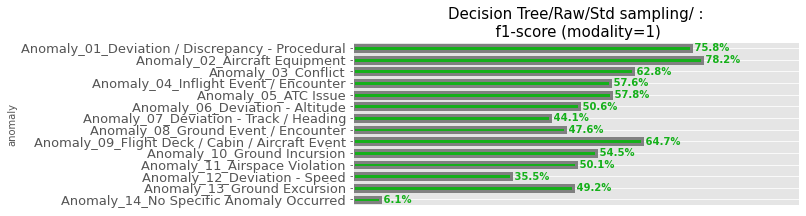

In [388]:
# Call the function on the BERT models only
plot_1_model_all_label_scores(df_model_results = model_results_BASELINE_select_toplot,
                      metric = "f1-score",
                      dict_model_color = dict_model_color)

#### recall

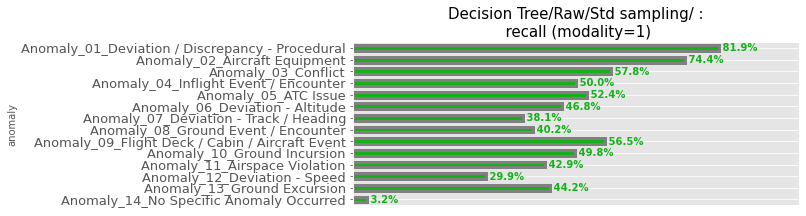

In [389]:
# Call the function on the BERT models only
plot_1_model_all_label_scores(df_model_results = model_results_BASELINE_select_toplot,
                      metric = "recall",
                      dict_model_color = dict_model_color)

#### precision

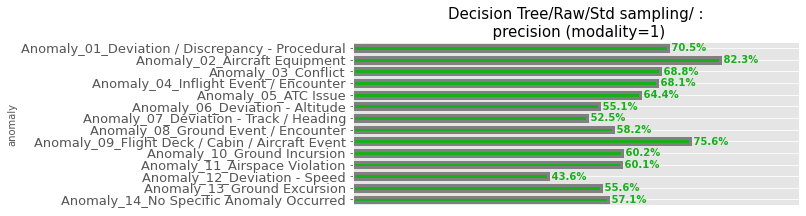

In [390]:
# Call the function on the BERT models only
plot_1_model_all_label_scores(df_model_results = model_results_BASELINE_select_toplot,
                      metric = "precision",
                      dict_model_color = dict_model_color)

#### Definition of the df to plot for BERT models

In [391]:
# Definition of the df to plot : model_results_multilabel_BERT_select_toplot
model_results_multilabel_BERT_select_toplot=model_results_multilabel_BERT_select.copy()
model_results_multilabel_BERT_select_toplot['anomaly']=model_results_multilabel_BERT_select_toplot['anomaly'].replace(dict_anomaly_label_ordered)

#### f1-score

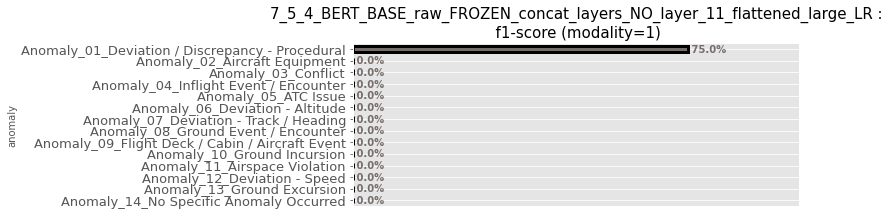

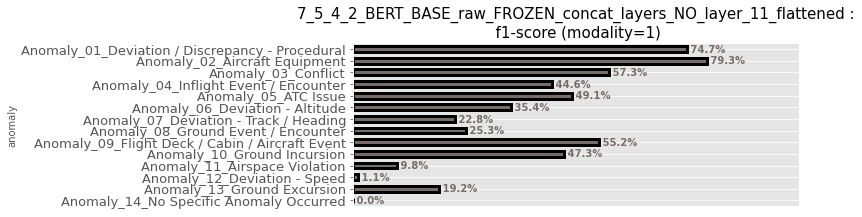

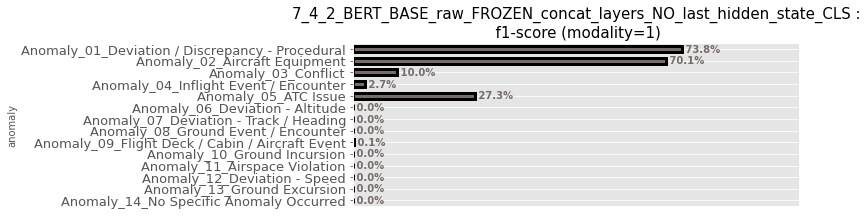

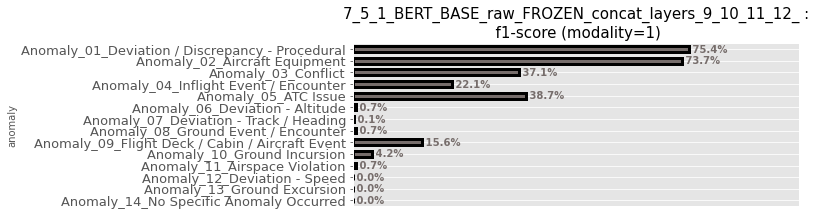

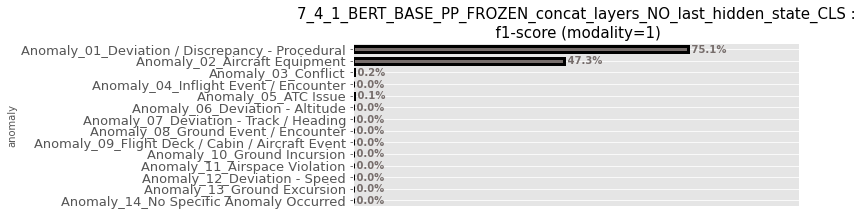

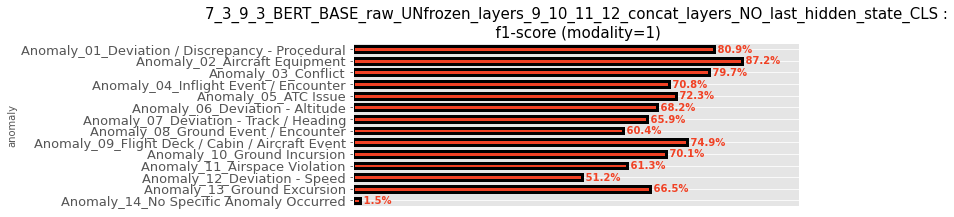

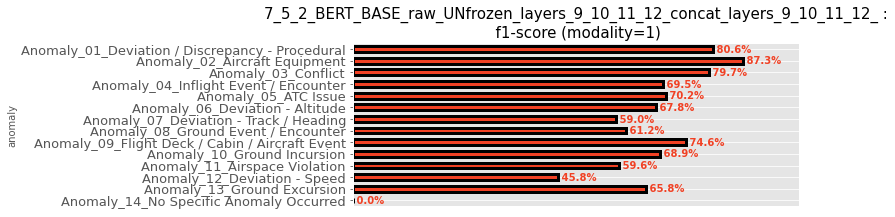

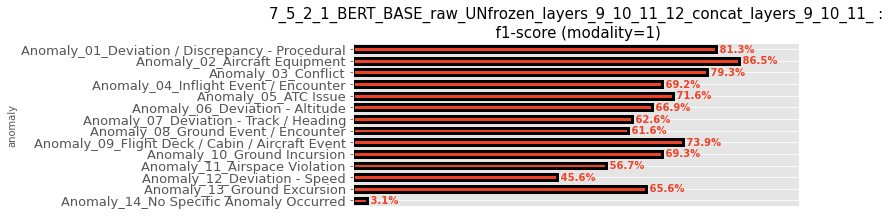

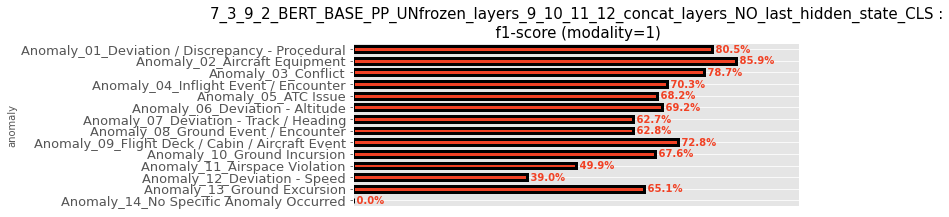

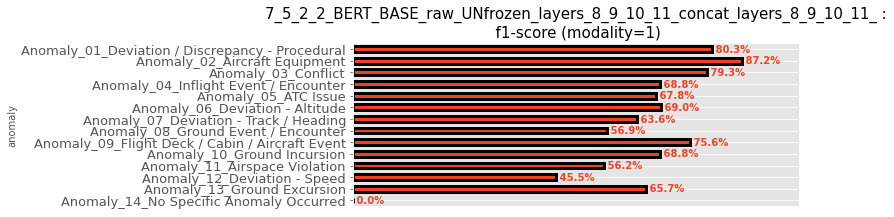

In [392]:
# Call the function on the BERT models only
plot_1_model_all_label_scores(df_model_results = model_results_multilabel_BERT_select_toplot,
                      metric = "f1-score",
                      dict_model_color = dict_model_color)

#### recall

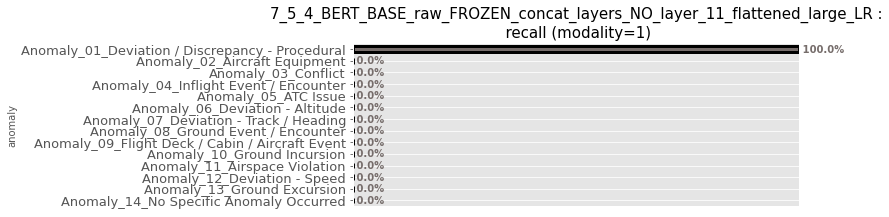

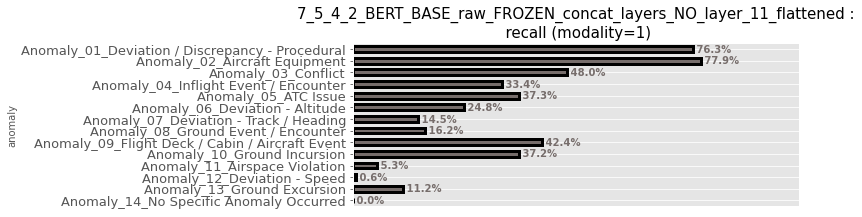

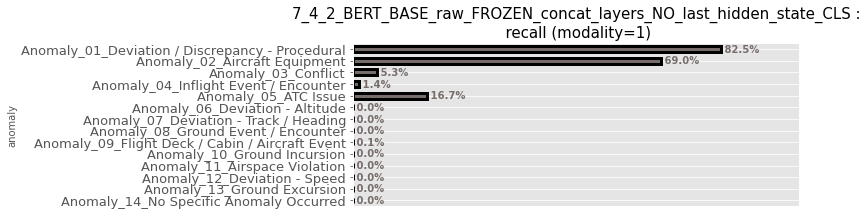

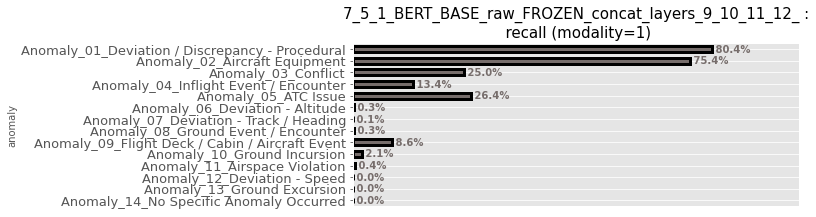

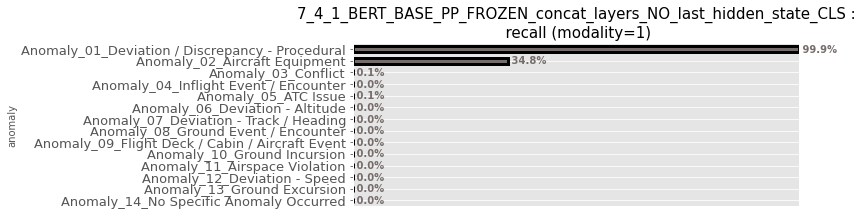

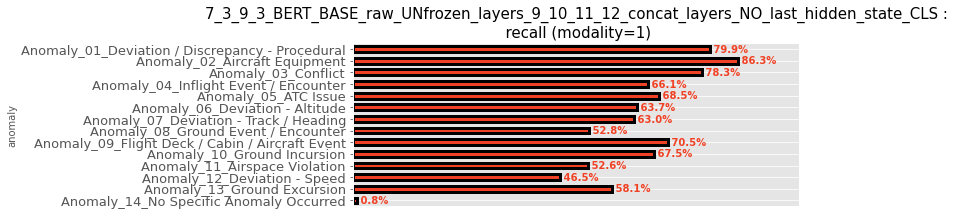

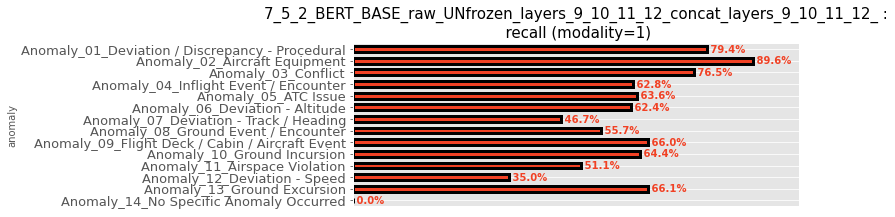

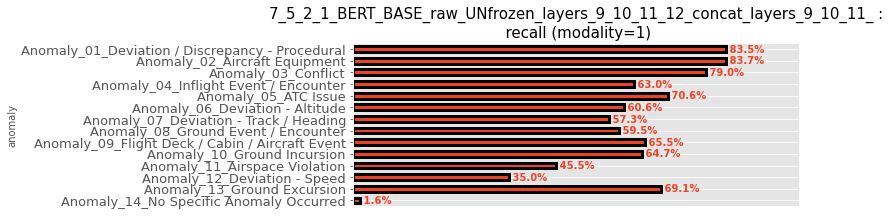

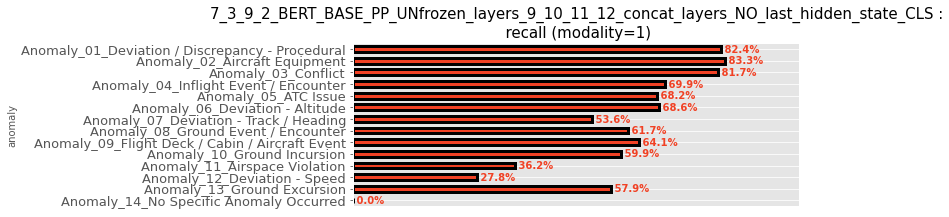

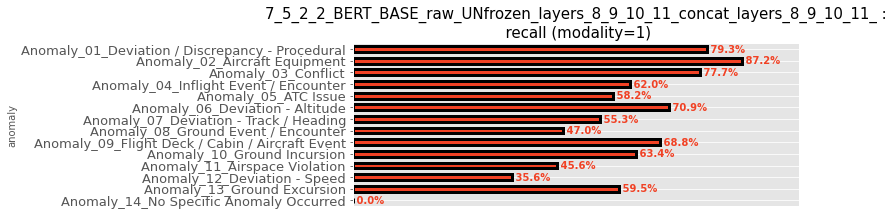

In [393]:
# Call the function on the BERT models only
plot_1_model_all_label_scores(df_model_results = model_results_multilabel_BERT_select_toplot,
                      metric = "recall",
                      dict_model_color = dict_model_color)

#### precision

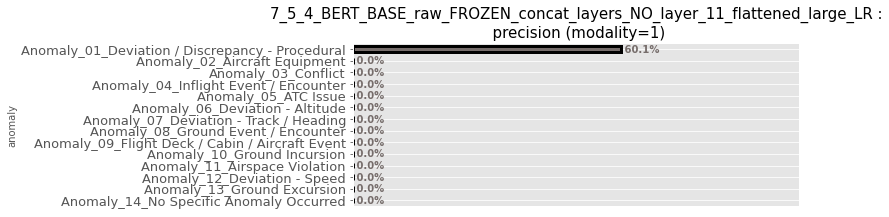

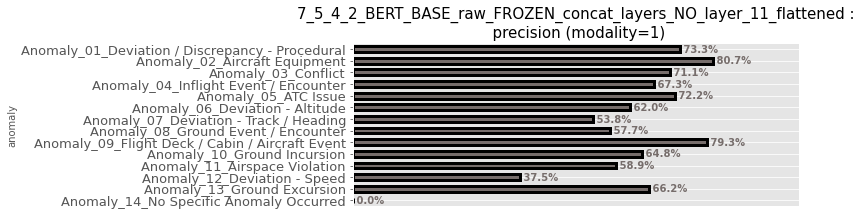

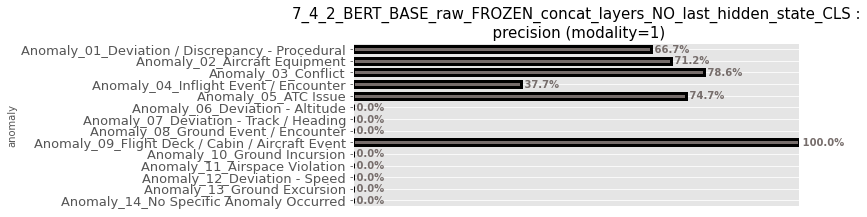

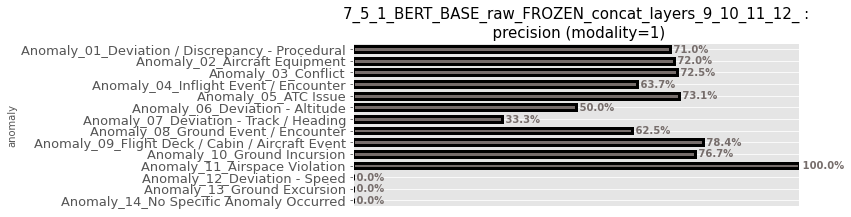

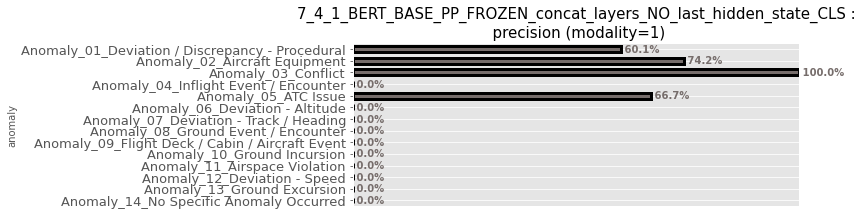

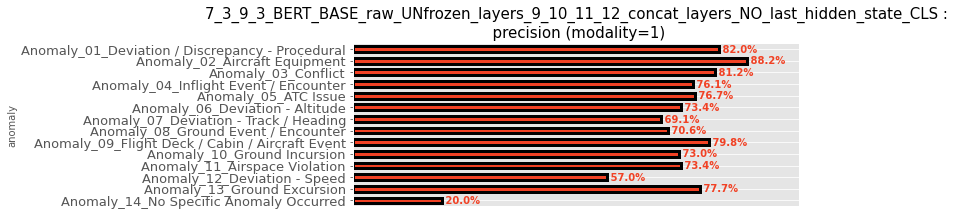

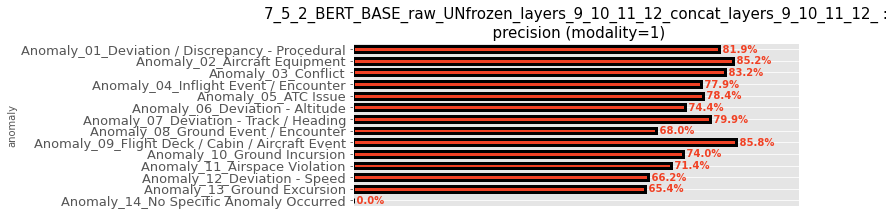

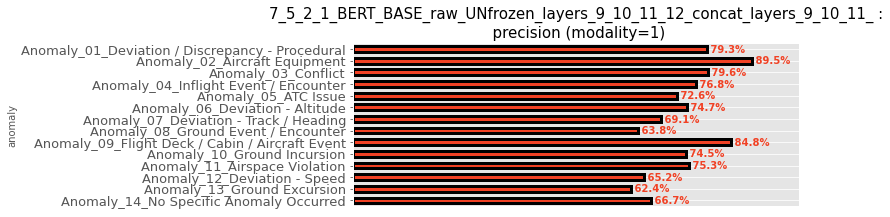

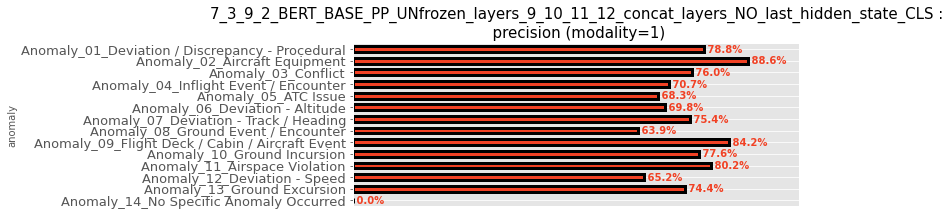

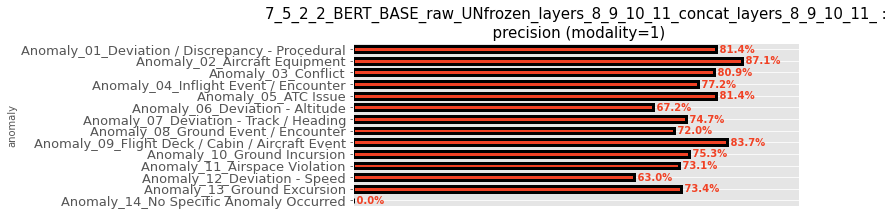

In [394]:
# Call the function on the BERT models only
plot_1_model_all_label_scores(df_model_results = model_results_multilabel_BERT_select_toplot,
                      metric = "precision",
                      dict_model_color = dict_model_color)

# Compare all models for all anomalies

## Dataframe of metric differences with BaseLine models

In [395]:
model_results.head()


approach         model_label                      classifier      \
0  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
1  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
2  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
3  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
4  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   

  preprocessing  undersampling anomaly                                        \
0  0             0              Anomaly_Deviation / Discrepancy - Procedural   
1  0             0              Anomaly_Deviation / Discrepancy - Procedural   
2  0             0              Anomaly_Deviation / Discrepancy - Procedural   
3  0             0              Anomaly_Deviation / Discrepancy - Procedural   
4  0             0                                Anomaly_Aircraft Equipment   

  metric      1             import_order  
0  precision      0.705148  0             
1     recall      0.819415  0             
2   f1-score      0.757999  0             
3    support  11651.000000  0             
4  precision      0.822690  0

In [396]:
# Root label (source = ASRS coding forms) : order = by descending frequency
Anomaly_RootLabels=['Deviation / Discrepancy - Procedural',
                    'Aircraft Equipment',
                    'Conflict',
                    'Inflight Event / Encounter',
                    'ATC Issue',
                    'Deviation - Altitude',
                    'Deviation - Track / Heading',
                    'Ground Event / Encounter',
                    'Flight Deck / Cabin / Aircraft Event',
                    'Ground Incursion',
                    'Airspace Violation',
                    'Deviation - Speed',
                    'Ground Excursion',
                    'No Specific Anomaly Occurred']
metric_list=['f1-score','recall','precision']


In [397]:
model_results_diffBLM=pd.DataFrame(columns=model_results.columns)
for metric in metric_list:
  for anomaly_rl in Anomaly_RootLabels :
    anomaly_col='Anomaly_' + anomaly_rl
    model_results_anomaly_metric=model_results[(model_results['anomaly']==anomaly_col)&(model_results['metric']==metric)]
    model_results_anomaly_metric_BLM=model_results_anomaly_metric[model_results_anomaly_metric['model_label']=='Decision Tree/Raw/Std sampling/']
    model_results_anomaly_metric_diffBLM=model_results_anomaly_metric
    blm=model_results_anomaly_metric_BLM['1'].values
    model_results_anomaly_metric_diffBLM['1']=model_results_anomaly_metric_diffBLM['1']-blm[0]
    model_results_diffBLM= pd.concat([model_results_diffBLM,
                          model_results_anomaly_metric_diffBLM
                          ], 
                          axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [398]:
model_results_diffBLM.head(200)

approach                             \
2                        Base line model   
90    BoW Unsupervised feature selection   
114   BoW Unsupervised feature selection   
202   BoW Unsupervised feature selection   
226   BoW Unsupervised feature selection   
314   BoW Unsupervised feature selection   
338   BoW Unsupervised feature selection   
426   BoW Unsupervised feature selection   
482   BoW Unsupervised feature selection   
506   BoW Unsupervised feature selection   
562   BoW Unsupervised feature selection   
618   BoW Unsupervised feature selection   
674   BoW Unsupervised feature selection   
730   BoW Unsupervised feature selection   
818   BoW Unsupervised feature selection   
842     BoW Supervised feature selection   
898     BoW Supervised feature selection   
954     BoW Supervised feature selection   
1010    BoW Supervised feature selection   
1066    BoW Supervised feature selection   
1122    BoW Supervised feature selection   
1178    BoW Supervised feature selection   
1234    BoW Supervised feature selection   
1290    BoW Supervised feature selection   
1346    BoW Supervised feature selection   
1402    BoW Supervised feature selection   
1458    BoW Supervised feature selection   
1514    BoW Supervised feature selection   
1570    BoW Supervised feature selection   
1626    BoW Supervised feature selection   
1682    BoW Supervised feature selection   
1738    BoW Supervised feature selection   
1794    BoW Supervised feature selection   
1850    BoW Supervised feature selection   
1906    BoW Supervised feature selection   
1962    BoW Supervised feature selection   
2018    BoW Supervised feature selection   
2074    BoW Supervised feature selection   
2130    BoW Supervised feature selection   
2186    BoW Supervised feature selection   
2242    BoW Supervised feature selection   
2298    BoW Supervised feature selection   
2354    BoW Supervised feature selection   
2410    BoW Supervised feature selection   
2466    BoW Supervised feature selection   
2522    BoW Supervised feature selection   
2578    BoW Supervised feature selection   
2634    BoW Supervised feature selection   
2690    BoW Supervised feature selection   
2746    BoW Supervised feature selection   
2802    BoW Supervised feature selection   
2858    BoW Supervised feature selection   
2914    BoW Supervised feature selection   
2970    BoW Supervised feature selection   
3026    BoW Supervised feature selection   
3082    BoW Supervised feature selection   
3138    BoW Supervised feature selection   
3194    BoW Supervised feature selection   
3250    BoW Supervised feature selection   
3306    BoW Supervised feature selection   
3362    BoW Supervised feature selection   
3418    BoW Supervised feature selection   
3474    BoW Supervised feature selection   
3530    BoW Supervised feature selection   
3586    BoW Supervised feature selection   
3642    BoW Supervised feature selection   
3698    BoW Supervised feature selection   
3754    BoW Supervised feature selection   
3810    BoW Supervised feature selection   
3866    BoW Supervised feature selection   
3922    BoW Supervised feature selection   
3978    BoW Supervised feature selection   
4034    BoW Supervised feature selection   
4122                      Word-Embedding   
4178                      Word-Embedding   
4234                      Word-Embedding   
4290                      Word-Embedding   
4346                      Word-Embedding   
4402                      Word-Embedding   
4458                      Word-Embedding   
4514                      Word-Embedding   
4570                      Word-Embedding   
4626                      Word-Embedding   
4682                      Word-Embedding   
4738                      Word-Embedding   
4794                      Word-Embedding   
4850                      Word-Embedding   
4906                      Word-Embedding   
4962                                BERT   
5018                                BERT   
5

#### Function plot_diff_metric_universal 

In [399]:
def plot_diff_metric_universal(df_model_results,anomaly_list=[],metric="f1-score",dict_model_color={}):
    """
    Plots, for each anomaly, the evolution of  "metric" 
    Inputs: 
    - model_results : a df containing the classification report metrics of our different "models" to plot
      Models include : classifier type and modeling options such as  raw/PP narratives, std or under sampling, count_vectorizer options
    - a list of anomaly features : if the list is empty : 
    - metric : one of the model results metrics : "precision", "recall", "f1-score" or "support"
    - dict_color : dictionnary defining a color for each type of model listed (grey if non listed)
    
    Returns:
    - 1 plot per anomaly listed
      - for models using undersampling, the line  of the rectangle is thiner
      - for models using raw narratives (vs PP), the line  of the rectangle is grey instead of black

    """
    if anomaly_list==[] :
      anomaly_list=df_model_results['anomaly'].unique().tolist()
    for anomaly in anomaly_list :
  
      # Anomaly_label without the prefix "Anomaly_"
      anomaly_label=anomaly.replace("Anomaly_", "")  
      
      # Dealing with rows and columns to use according to the metric choice (accuracy is a column not a row) + graph title
      # if metric=="accuracy":
      #   modality_col="accuracy"
      #   metric_row="support"
      #   title_ToPlot=anomaly_label+" :  accuracy"
      # elif modality=="macro avg":
      #    modality_col=modality
      #    metric_row=metric
      #    title_ToPlot=anomaly_label+" :  "+ metric+"(macro avg)"
      # else :
      modality_col='1'
      metric_row=metric
      title_ToPlot=anomaly_label+" :\n  Difference of "+ metric+" (modality=1) vs Baseline model "



      # dataframe containing only the rows to plot
      sub_df = df_model_results[(df_model_results['anomaly'] == anomaly) & (df_model_results['metric'] == metric_row)] .copy()
      # label of the model , including options
      sub_df=sub_df.set_index('model_label')
      # defining color, edgecolot, linewidth of the bar according to the model characteristics
      sub_df['color']=sub_df['classifier'].apply(lambda x: dict_model_color[x] if x in list(dict_model_color.keys()) else 'grey')
      sub_df['edgecolor']=sub_df['preprocessing'].apply(lambda x: 'grey' if x==0 else 'black')
      sub_df['linewidth']=sub_df['undersampling'].apply(lambda x: 3 if x==0 else 1)
      
      # Plot
      fig = plt.figure()
      plt.style.use('ggplot')
      plt.rcParams['axes.titlesize'] = 15
      plt.rcParams['axes.labelsize'] = 10
      plt.rcParams['xtick.labelsize'] = 10
      plt.rcParams['ytick.labelsize'] = 13
      plt.rc('legend', fontsize=10)    # legend fontsize

      
      num_classes = len(sub_df)
      fig_shape=(8,num_classes//4)

      colors=list(sub_df['color'])
      edgecolors=list(sub_df['edgecolor'])
      linewidths=list(sub_df['linewidth'])
      iter_color = iter(colors)

      sub_df[modality_col].plot.barh(title=title_ToPlot, 
                                                      ylabel="Topics",
                                                      color=colors,
                                                      edgecolor=edgecolors,
                                                      linewidth=linewidths,
                                                      figsize=fig_shape) # indicative value for BERT models only: (8,7)
      if metric!="support":
        plt.xlim([-1,1])
        plt.xticks([])
        for i, v in enumerate(sub_df[modality_col]):
          c = next(iter_color)
          if v>=0 :
            y=v
          else :
            y=v-0.2
          plt.text(y, i,           # si bar au lieu de barh : inverser v et i
                   " "+str(round(v*100,1))+"%", 
                    color=c, 
                    va='center', 
                    fontweight='bold')

      else : 
          for i, v in enumerate(sub_df[modality_col]):
            c = next(iter_color)
            plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                    " "+str(int(v)), 
                    color=c, 
                    va='center', 
                    fontweight='bold')


##### Example for all anomalies, 1 metric

###### f1-score

In [400]:
plot_diff_metric_universal(df_model_results = model_results_diffBLM.sort_values(by = ['import_order'], ascending = False),
                      metric = "f1-score",
                      dict_model_color = dict_model_color)

Output hidden; open in https://colab.research.google.com to view.

##### Example for 1 anomaly all metrics

In [401]:
#anomaly='Anomaly_Aircraft Equipment'
anomaly='Anomaly_Deviation - Altitude'
plot_diff_metric_universal(df_model_results=model_results_diffBLM.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="f1-score",dict_model_color=dict_model_color)
plot_diff_metric_universal(df_model_results=model_results_diffBLM.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="recall",dict_model_color=dict_model_color)
plot_diff_metric_universal(df_model_results=model_results_diffBLM.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="precision",dict_model_color=dict_model_color)

Output hidden; open in https://colab.research.google.com to view.

# Comparing approaches for all anomalies

## Model selection for "BoW Supervised feature selection" approach

In [402]:
BoW_SFS_Best_model_Dictionnary={
    'Anomaly_Deviation / Discrepancy - Procedural':'Random Forest/PP/Std sampling/impce= 750',
    'Anomaly_Aircraft Equipment':'Random Forest/PP/Under sampling/impce= 750',
    'Anomaly_Conflict':'Gradient Boosting/PP/Under sampling/impce= 100',
    'Anomaly_Inflight Event / Encounter':'Gradient Boosting/PP/Under sampling/impce= 250',
    'Anomaly_ATC Issue':'Gradient Boosting/PP/Under sampling/impce= 250',
    'Anomaly_Deviation - Altitude':'Gradient Boosting/PP/Std sampling/impce= 500',
    'Anomaly_Deviation - Track / Heading':'Gradient Boosting/PP/Std sampling/impce= 100',
    'Anomaly_Ground Event / Encounter':'Gradient Boosting/PP/Std sampling/impce= 250',
    'Anomaly_Flight Deck / Cabin / Aircraft Event':'Random Forest/PP/Std sampling/impce= 50',
    'Anomaly_Ground Incursion':'Random Forest/PP/Std sampling/impce= 30',
    'Anomaly_Airspace Violation':'Random Forest/PP/Std sampling/impce= 30',
    'Anomaly_Deviation - Speed':'Random Forest/PP/Std sampling/impce= 20',
    'Anomaly_Ground Excursion':'Random Forest/PP/Std sampling/impce= 30',
    'Anomaly_No Specific Anomaly Occurred':'Decision Tree/PP/Std sampling/impce= 750'
}

In [403]:
# We define an empty DF with the same columns as model_results_diffBLM
model_results_diffBLM_bestmodel_BoW_SFS=pd.DataFrame(columns=model_results_diffBLM.columns)

# We loop on anomalies and keep the rows corresponding to the best model (according to the dictionnary) only for the 'BoW Supervised feature selection' appraoch
for anomaly in list(BoW_SFS_Best_model_Dictionnary.keys()) :
  best_model_result= model_results_diffBLM[(model_results_diffBLM['approach']=='BoW Supervised feature selection')&(model_results_diffBLM['anomaly']==anomaly)&(model_results_diffBLM['model_label']==BoW_SFS_Best_model_Dictionnary[anomaly])]
  model_results_diffBLM_bestmodel_BoW_SFS= pd.concat([model_results_diffBLM_bestmodel_BoW_SFS,
                          best_model_result
                          ], 
                          axis=0)

In [404]:
print(len(model_results_diffBLM_bestmodel_BoW_SFS), " should be " , 14 *3)
model_results_diffBLM_bestmodel_BoW_SFS

42  should be  42


approach                           \
2914  BoW Supervised feature selection   
2913  BoW Supervised feature selection   
2912  BoW Supervised feature selection   
3534  BoW Supervised feature selection   
3533  BoW Supervised feature selection   
3532  BoW Supervised feature selection   
2586  BoW Supervised feature selection   
2585  BoW Supervised feature selection   
2584  BoW Supervised feature selection   
2534  BoW Supervised feature selection   
2533  BoW Supervised feature selection   
2532  BoW Supervised feature selection   
2538  BoW Supervised feature selection   
2537  BoW Supervised feature selection   
2536  BoW Supervised feature selection   
1814  BoW Supervised feature selection   
1813  BoW Supervised feature selection   
1812  BoW Supervised feature selection   
1930  BoW Supervised feature selection   
1929  BoW Supervised feature selection   
1928  BoW Supervised feature selection   
1878  BoW Supervised feature selection   
1877  BoW Supervised feature selection   
1876  BoW Supervised feature selection   
3170  BoW Supervised feature selection   
3169  BoW Supervised feature selection   
3168  BoW Supervised feature selection   
3286  BoW Supervised feature selection   
3285  BoW Supervised feature selection   
3284  BoW Supervised feature selection   
3290  BoW Supervised feature selection   
3289  BoW Supervised feature selection   
3288  BoW Supervised feature selection   
3406  BoW Supervised feature selection   
3405  BoW Supervised feature selection   
3404  BoW Supervised feature selection   
3298  BoW Supervised feature selection   
3297  BoW Supervised feature selection   
3296  BoW Supervised feature selection   
950   BoW Supervised feature selection   
949   BoW Supervised feature selection   
948   BoW Supervised feature selection   

     model_label                                     classifier          \
2914        Random Forest/PP/Std sampling/impce= 750      Random Forest   
2913        Random Forest/PP/Std sampling/impce= 750      Random Forest   
2912        Random Forest/PP/Std sampling/impce= 750      Random Forest   
3534      Random Forest/PP/Under sampling/impce= 750      Random Forest   
3533      Random Forest/PP/Under sampling/impce= 750      Random Forest   
3532      Random Forest/PP/Under sampling/impce= 750      Random Forest   
2586  Gradient Boosting/PP/Under sampling/impce= 100  Gradient Boosting   
2585  Gradient Boosting/PP/Under sampling/impce= 100  Gradient Boosting   
2584  Gradient Boosting/PP/Under sampling/impce= 100  Gradient Boosting   
2534  Gradient Boosting/PP/Under sampling/impce= 250  Gradient Boosting   
2533  Gradient Boosting/PP/Under sampling/impce= 250  Gradient Boosting   
2532  Gradient Boosting/PP/Under sampling/impce= 250  Gradient Boosting   
2538  Gradient Boosting/PP/Under sampling/impce= 250  Gradient Boosting   
2537  Gradient Boosting/PP/Under sampling/impce= 250  Gradient Boosting   
2536  Gradient Boosting/PP/Under sampling/impce= 250  Gradient Boosting   
1814    Gradient Boosting/PP/Std sampling/impce= 500  Gradient Boosting   
1813    Gradient Boosting/PP/Std sampling/impce= 500  Gradient Boosting   
1812    Gradient Boosting/PP/Std sampling/impce= 500  Gradient Boosting   
1930    Gradient Boosting/PP/Std sampling/impce= 100  Gradient Boosting   
1929    Gradient Boosting/PP/Std sampling/impce= 100  Gradient Boosting   
1928    Gradient Boosting/PP/Std sampling/impce= 100  Gradient Boosting   
1878    Gradient Boosting/PP/Std sampling/impce= 250  Gradient Boosting   
1877    Gradient Boosting/PP/Std sampling/impce= 250  Gradient Boosting   
1876    Gradient Boosting/PP/Std sampling/impce= 250  Gradient Boosting   
3170         Random Forest/PP/Std sampling/impce= 50      Random Forest   
3169         Random Forest/PP/Std sampling/impce= 50      Random Forest   
3168         Random Forest/PP/Std sampling/impce= 50      Random Forest   
3286         Random Forest/PP/Std sampling/impce= 30      Random Forest   
3285         Random For

In [405]:
model_results_diffBLM_bestmodel_BoW_SFS['model_label']='Best BoW Supervised feature selection Model'

In [406]:
model_results_diffBLM['approach'].value_counts()

BoW Supervised feature selection      2436
Word-Embedding                         630
BoW Unsupervised feature selection     588
BERT                                   420
Base line model                         42
Name: approach, dtype: int64

In [407]:
model_results_diffBLM_bestmodel=pd.concat([
                          model_results_diffBLM[(model_results_diffBLM['approach']=='Base line model')],
                          model_results_diffBLM[(model_results_diffBLM['approach']=='BoW Unsupervised feature selection')],
                          model_results_diffBLM_bestmodel_BoW_SFS,
                          model_results_diffBLM[(model_results_diffBLM['approach']=='Word-Embedding')],
                          model_results_diffBLM[(model_results_diffBLM['approach']=='BERT')]
 
                          ], 
                          axis=0)

In [408]:
model_results_diffBLM_bestmodel.head()

approach         model_label                      classifier      \
2   Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
6   Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
10  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
14  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
18  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   

   preprocessing undersampling anomaly                                        \
2   0             0             Anomaly_Deviation / Discrepancy - Procedural   
6   0             0                               Anomaly_Aircraft Equipment   
10  0             0                                         Anomaly_Conflict   
14  0             0                       Anomaly_Inflight Event / Encounter   
18  0             0                                        Anomaly_ATC Issue   

   metric     1   import_order  
2   f1-score  0.0  0            
6   f1-score  0.0  0            
10  f1-score  0.0  0            
14  f1-score  0.0  0            
18  f1-score  0.0  0

##### Example for 1 anomaly all metrics

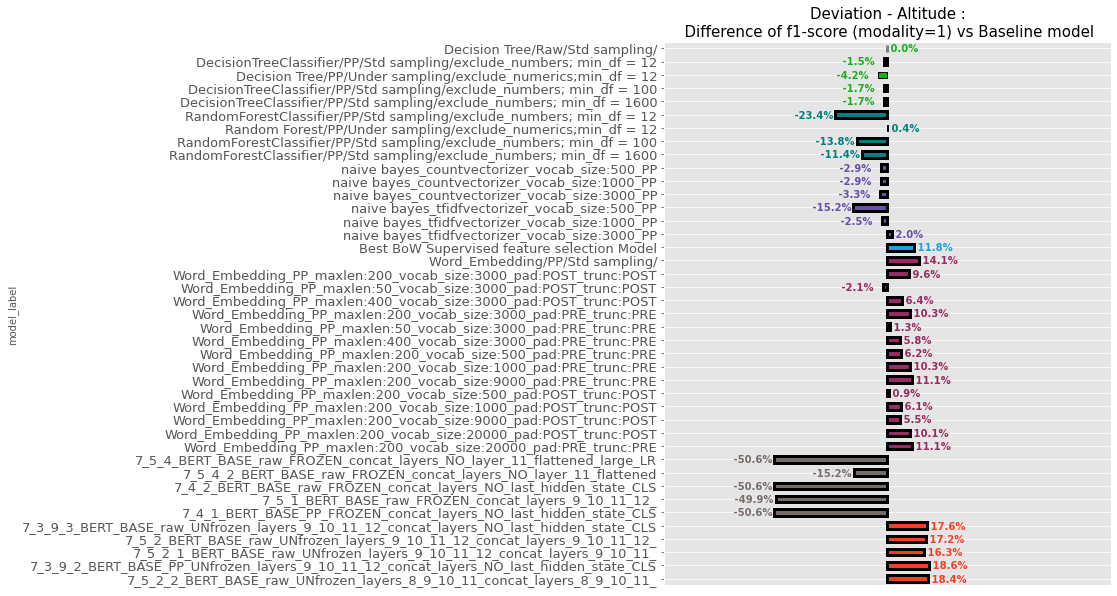

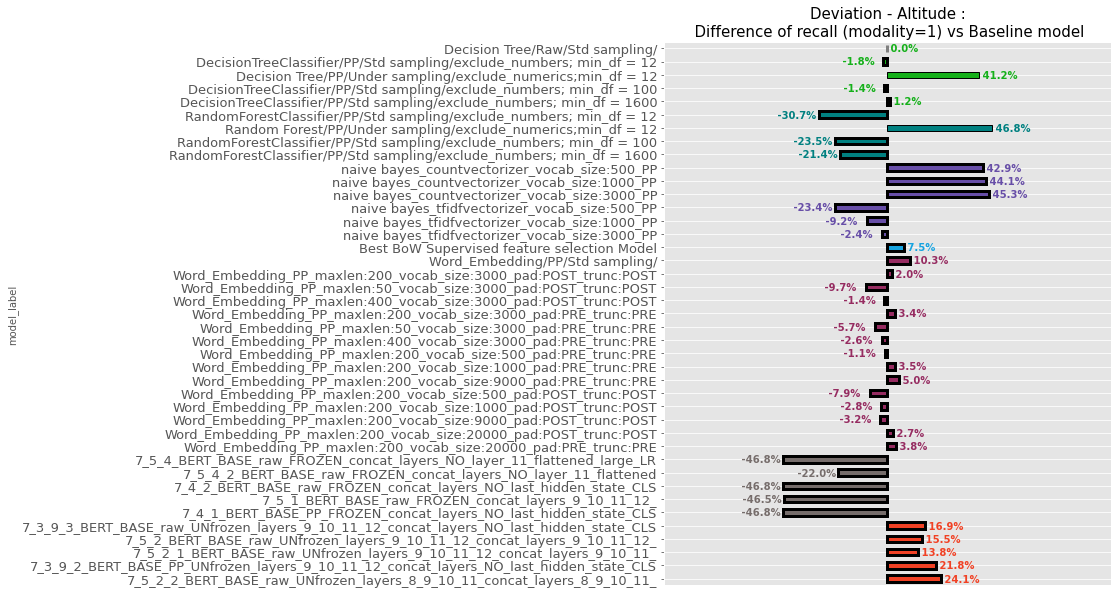

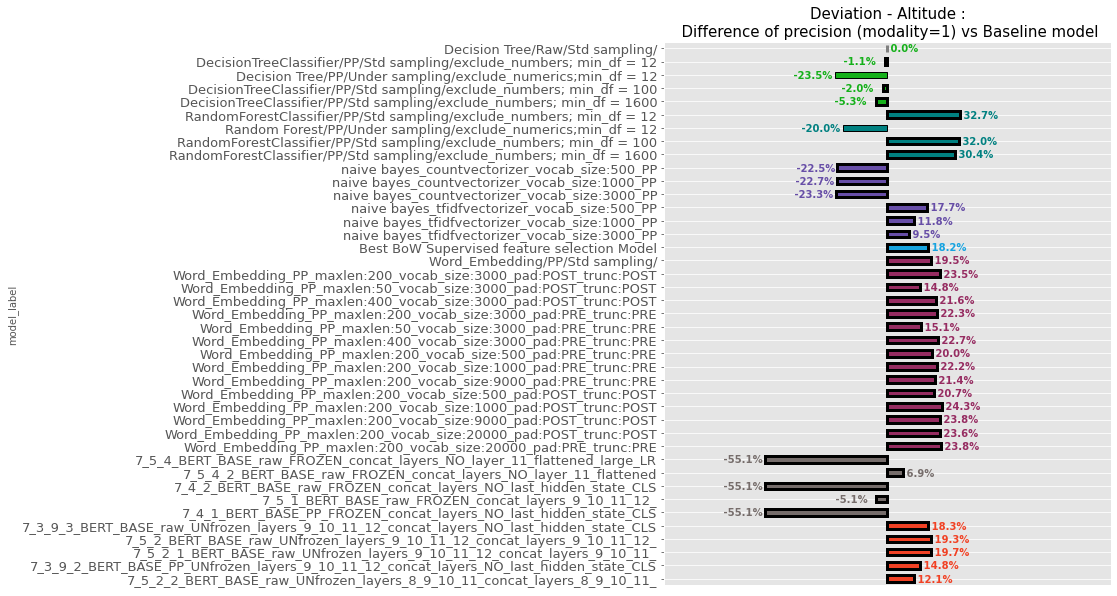

In [409]:
#anomaly='Anomaly_Aircraft Equipment'
anomaly='Anomaly_Deviation - Altitude'
plot_diff_metric_universal(df_model_results=model_results_diffBLM_bestmodel.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="f1-score",dict_model_color=dict_model_color)
plot_diff_metric_universal(df_model_results=model_results_diffBLM_bestmodel.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="recall",dict_model_color=dict_model_color)
plot_diff_metric_universal(df_model_results=model_results_diffBLM_bestmodel.sort_values(by = ['import_order'], ascending = False),anomaly_list=[anomaly],metric="precision",dict_model_color=dict_model_color)

In [410]:
# Analysis In details for 1 anomaly / 1 model name
model_name='Decision Tree/Raw/Std sampling/'

stats=model_results[(model_results['anomaly']=='Anomaly_Deviation - Altitude')&(model_results['model_label']==model_name)]
stats

approach         model_label                      classifier      \
20  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
21  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
22  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   
23  Base line model  Decision Tree/Raw/Std sampling/  Decision Tree   

   preprocessing  undersampling anomaly                       metric      \
20  0             0              Anomaly_Deviation - Altitude  precision   
21  0             0              Anomaly_Deviation - Altitude     recall   
22  0             0              Anomaly_Deviation - Altitude   f1-score   
23  0             0              Anomaly_Deviation - Altitude    support   

    1            import_order  
20     0.550577  0             
21     0.468245  0             
22     0.506084  0             
23  1732.000000  0

## Global comparison of approaches : F1-SCORE

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


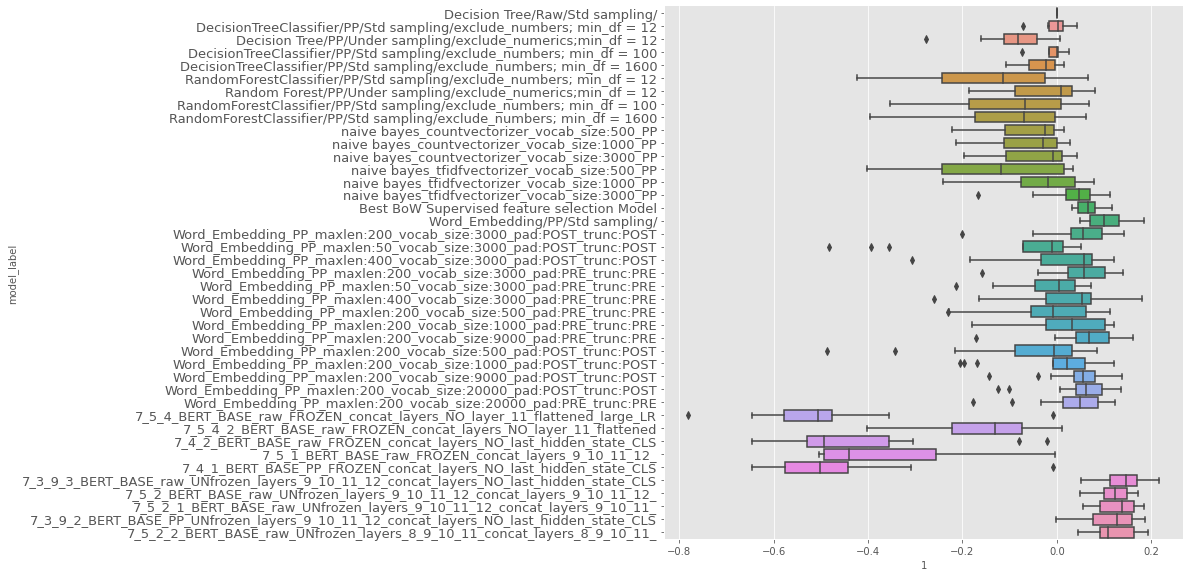

In [411]:
sns.catplot(data=model_results_diffBLM_bestmodel[(model_results_diffBLM_bestmodel['metric']=='f1-score')&(model_results_diffBLM_bestmodel['anomaly']!='Anomaly_No Specific Anomaly Occurred')],y='model_label',x='1',kind ='box' ,orient='h',height=8);

In [412]:
# # Set pandas settings to show all data when using .head(), .columns etc.
# # Set pandas settings to display full text columns
# pd.options.display.max_colwidth = None
# model_results_diffBLM_bestmodel[(model_results_diffBLM_bestmodel['metric']=='f1-score')&(model_results_diffBLM_bestmodel['anomaly']=='Anomaly_Conflict')]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


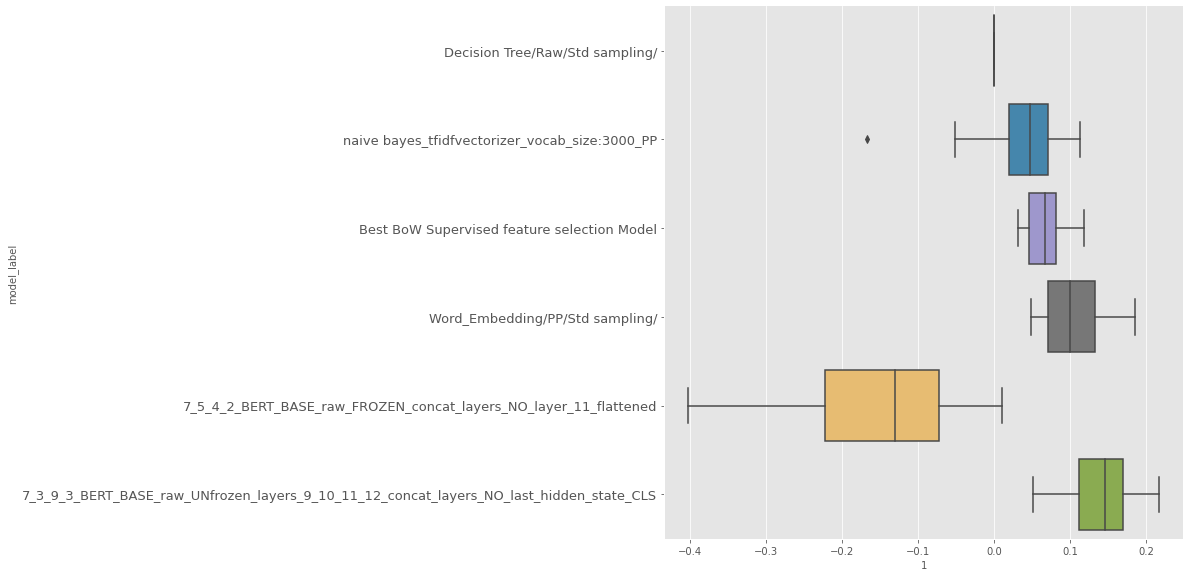

In [413]:
# FOCUS ON BEST MODELS FOR EAH APPROACH

sns.catplot(data=model_results_diffBLM_bestmodel[(model_results_diffBLM_bestmodel['metric']=='f1-score') \
                                                 &(model_results_diffBLM_bestmodel['model_label'].isin(['Decision Tree/Raw/Std sampling/' \
                                                        , 'naive bayes_tfidfvectorizer_vocab_size:3000_PP'
                                                        ,'Best BoW Supervised feature selection Model'
                                                        ,'Word_Embedding/PP/Std sampling/'
                                                        ,'7_5_4_2_BERT_BASE_raw_FROZEN_concat_layers_NO_layer_11_flattened'
                                                        ,'7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_12_concat_layers_NO_last_hidden_state_CLS'])) \
                  
                                                 &(model_results_diffBLM_bestmodel['anomaly']!='Anomaly_No Specific Anomaly Occurred')] \
            ,y='model_label',x='1',kind ='box' ,orient='h',height=8);

In [414]:
# Analysis In details for 1 model_name
model_name='naive bayes_tfidfvectorizer_vocab_size:3000_PP'  
# ['Decision Tree/Raw/Std sampling/' \
#                                                         , 'naive bayes_tfidfvectorizer_vocab_size:3000_PP'
#                                                         ,'Best BoW Supervised feature selection Model'
#                                                         ,'Word_Embedding/PP/Std sampling/'
#                                                         ,'7_5_4_2_BERT_BASE_raw_FROZEN_concat_layers_NO_layer_11_flattened'
#                                                         ,'7_3_9_3_BERT_BASE_raw_UNfrozen_layers_9_10_11_12_concat_layers_NO_last_hidden_state_CLS']

stats=model_results_diffBLM_bestmodel[(model_results_diffBLM_bestmodel['metric']=='f1-score')&(model_results_diffBLM_bestmodel['anomaly']!='Anomaly_No Specific Anomaly Occurred')&(model_results_diffBLM_bestmodel['model_label']==model_name)]
stats.sort_values(by='1')

approach                             \
810  BoW Unsupervised feature selection   
790  BoW Unsupervised feature selection   
834  BoW Unsupervised feature selection   
806  BoW Unsupervised feature selection   
822  BoW Unsupervised feature selection   
818  BoW Unsupervised feature selection   
798  BoW Unsupervised feature selection   
786  BoW Unsupervised feature selection   
794  BoW Unsupervised feature selection   
830  BoW Unsupervised feature selection   
814  BoW Unsupervised feature selection   
826  BoW Unsupervised feature selection   
802  BoW Unsupervised feature selection   

    model_label                                     classifier    \
810  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   
790  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   
834  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   
806  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   
822  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   
818  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   
798  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   
786  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   
794  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   
830  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   
814  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   
826  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   
802  naive bayes_tfidfvectorizer_vocab_size:3000_PP  naive bayes   

    preprocessing undersampling anomaly                                        \
810  1             0                                Anomaly_Deviation - Speed   
790  1             0                               Anomaly_Airspace Violation   
834  1             0                       Anomaly_Inflight Event / Encounter   
806  1             0                             Anomaly_Deviation - Altitude   
822  1             0                                 Anomaly_Ground Excursion   
818  1             0             Anomaly_Deviation / Discrepancy - Procedural   
798  1             0             Anomaly_Flight Deck / Cabin / Aircraft Event   
786  1             0                               Anomaly_Aircraft Equipment   
794  1             0                                        Anomaly_ATC Issue   
830  1             0                         Anomaly_Ground Event / Encounter   
814  1             0                      Anomaly_Deviation - Track / Heading   
826  1             0                                 Anomaly_Ground Incursion   
802  1             0                                         Anomaly_Conflict   

    metric     1        import_order  
810  f1-score -0.166993  784          
790  f1-score -0.051192  784          
834  f1-score -0.010301  784          
806  f1-score  0.019908  784          
822  f1-score  0.032434  784          
818  f1-score  0.042305  784          
798  f1-score  0.046648  784          
786  f1-score  0.056676  784          
794  f1-score  0.059502  784          
830  f1-score  0.070467  784          
814  f1-score  0.071378  784          
826  f1-score  0.091423  784          
802  f1-score  0.112836  784

In [415]:
stats.describe().T


count  mean      std       min       25%       50%       75%       max     
1  13.0   0.028853  0.072519 -0.166993  0.019908  0.046648  0.070467  0.112836

## Global comparison of approaches : RECALL

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


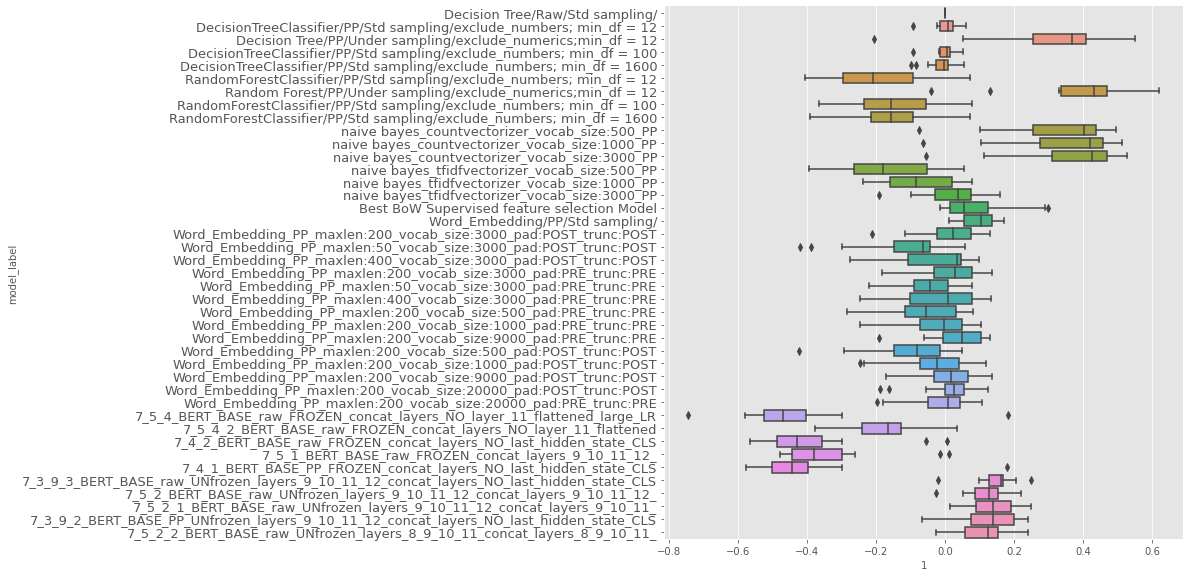

In [416]:
sns.catplot(data=model_results_diffBLM_bestmodel[(model_results_diffBLM_bestmodel['metric']=='recall')&(model_results_diffBLM_bestmodel['anomaly']!='Anomaly_No Specific Anomaly Occurred')],y='model_label',x='1',kind ='box' ,orient='h',height=8);

# OBSERVATIONS

as of 14.09.2022:

* the model with 'large_LR' at the end was not well trained, due to too large learning rate
* **RAW vs. PP-stemmed** narratives: cf. 7_3_9_2 (PP) and 7_3_9_3 (raw). Raw is higher for f1-score for most labels, but often lower for precision or recall !

**f1-score**
* 4 BERT models stand out by showing high scores, in contrast to the other models that have vanishing scores for low-populated Anomaly labels:
  * 7_5_2_BERT_BASE_raw_UNfrozen_layers_9_10_11_12_concat_layers_9_10_11_12
  * 7_5_2_1_BERT_BASE_raw_UNfrozen_layers_9_10_11_12_concat_layers_9_10_11
  * 7_5_2_2_BERT_BASE_raw_UNfrozen_layers_8_9_10_11_concat_layers_8_9_10_11
  * 7_3_9_2_BERT_BASE_PP_UNfrozen_layers_9_10_11_12_concat_layers_NO_last_hidden_state_CLS

  All these models have in common the fact that we unfroze the last 4 layers. 
  Comparing these models to the **frozen** model 7_5_1_BERT_BASE_raw_UNfrozen_layers_NO_concat_layers_9_10_11_12 (as well as to the other frozen models 7_4_1 and 7_5_4), 
  we conclude that unfreezing BERT's layers is necessary in our project.

* among the 4 UNfrozen models above, which delivers the top score, varies at each anomaly --> see plots '1 model, all labels'. 7_3_9_3 has the best for anomaly 'Speed'

* in terms of f1-score, BERT models outperform all the other models for all anomaly labels


**recall**
* BERT models always (?) outperform WordEmbedding models
* /!\ 7_4_1 and 7_5_4 yield 100% for Anomaly Procedural ?! These models class all data as '1', thus recall is 100% and precision corresponds to the percentage of the distribution of the labels. 
However (see 'Conflict') if you predict '0' for everyone, the f1-score is '0' too. 

* Random Forest **WITH undersampling** outperform BERT models for all anomalies except Aircraft Equipment (and Procedural, if we believe the 100% <-- WE SHOULDN'T ). But the precision is lower for Random Forest in these cases!

* For some anomalies, Gradient Boosting with UnderSampling outperforms BERT. But the Precision is lower in these cases!

**precision**
* WordEmbedding models outperform BERT models



# NEXT STEPS
**PLOTTING**

* plot the probability distributions of the models that have recall = 100% --> Ioannis plotted 
```
2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR
```
in
`8_1_2_Plot_y_pred_probabilities_20220917.ipynb`.
See the multilabel conf_mat: there is no enty under predicted labels == 1; the model puts everyone into '0'.



**Additional BERT model training:**

* run frozen model 7_7_1 using the 11th layer output (not flattened). The flattened one already showed rel. good results...

* run UNfrozen model using the 11th layer output (not flattened)

* use google/bert_uncased_L-12_H-256_A-4
which has N_emb = 256, a value close to 200, that you used in your WordEmbedding model

* instead of concatenation, try sum the 4 last layers?

**OTHER**
* SHAP analysis on BERT

* 1vsAll with best BERT. Parallelize the process by distributing among 2 notebooks that run in parallel 